In [7]:
! pip install ./python_files
from python_files import *
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available, training on: ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

Processing c:\users\tbird\documents\github\06-665-psm-final-project\python_files
  Created wheel for python-files: filename=python_files-0.1.0-py3-none-any.whl size=1023 sha256=dced6ae075dc7a3cfa6c2035290348a365a625b6f42038e9589f7f5b578defb1
  Stored in directory: C:\Users\tbird\AppData\Local\Temp\pip-ephem-wheel-cache-i2qg28ys\wheels\ca\c1\3d\7f33f532b3f9eddd59bbd2ddd1f7583d50a6829274a8d07efa
Successfully built python-files
  Attempting uninstall: python-files
    Found existing installation: python-files 0.1.0
    Uninstalling python-files-0.1.0:
      Successfully uninstalled python-files-0.1.0
GPU is available, training on:  NVIDIA GeForce RTX 2070 Super with Max-Q Design


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


# Training the NN

### Getting data for the NN training

In [15]:
# loading data from saved folder
loaded_solutions = np.load("./saved/100_solutions.npy")
loaded_F_ag_array = np.load("./saved/100_F_ag.npy")
loaded_test_solutions = np.load("./saved/10test_solutions.npy")
loaded_test_F_ag_array = np.load("./saved/10test_F_ag.npy")

np.allclose(loaded_solutions, solutions), \
np.allclose(loaded_F_ag_array, F_ag_array)



(True, True)

### The following block only needs to be used if new data is needed

num_timesteps = 500
1/100
ODE solution found: True
2/100
ODE solution found: True
3/100
ODE solution found: True
4/100
ODE solution found: True
5/100
ODE solution found: True
6/100
ODE solution found: True
7/100
ODE solution found: True
8/100
ODE solution found: True
9/100
ODE solution found: True
10/100
ODE solution found: True
11/100
ODE solution found: True
12/100
ODE solution found: True
13/100
ODE solution found: True
14/100
ODE solution found: True
15/100
ODE solution found: True
16/100
ODE solution found: True
17/100
ODE solution found: True
18/100
ODE solution found: True
19/100
ODE solution found: True
20/100
ODE solution found: True
21/100
ODE solution found: True
22/100
ODE solution found: True
23/100
ODE solution found: True
24/100
ODE solution found: True
25/100
ODE solution found: True
26/100
ODE solution found: True
27/100
ODE solution found: True
28/100
ODE solution found: True
29/100
ODE solution found: True
30/100
ODE solution found: True
31/100
ODE solution found: Tr

c:\Users\tbird\Documents\GitHub\06-665-PSM-Final-Project\python_files\ODE.py:40: RuntimeWarning: overflow encountered in double_scalars
  dCxdt = mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) - F_e*Cx/V
c:\Users\tbird\Documents\GitHub\06-665-PSM-Final-Project\python_files\ODE.py:40: RuntimeWarning: invalid value encountered in double_scalars
  dCxdt = mu_x(T_r) * Cx * Cs * np.exp(-K_P*Cp) / (K_S+Cs) - F_e*Cx/V
c:\Users\tbird\Documents\GitHub\06-665-PSM-Final-Project\python_files\ODE.py:41: RuntimeWarning: overflow encountered in double_scalars
  dCpdt = mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) - F_e*Cp/V
c:\Users\tbird\Documents\GitHub\06-665-PSM-Final-Project\python_files\ODE.py:41: RuntimeWarning: invalid value encountered in double_scalars
  dCpdt = mu_P * Cx * Cs * np.exp(-K_P1*Cp) / (K_S1+Cs) - F_e*Cp/V
c:\Users\tbird\Documents\GitHub\06-665-PSM-Final-Project\python_files\ODE.py:42: RuntimeWarning: overflow encountered in double_scalars
  dCsdt = (-mu_x(T_r) * Cx * Cs * np

72/100
ODE solution found: True
73/100
ODE solution found: True
74/100
ODE solution found: True
75/100
ODE solution found: True
76/100
ODE solution found: True
77/100
ODE solution found: True
78/100
ODE solution found: True
79/100
ODE solution found: True
80/100
ODE solution found: True
81/100
ODE solution found: True
82/100
ODE solution found: True
83/100
ODE solution found: True
84/100
ODE solution found: True
85/100
ODE solution found: True
86/100
ODE solution found: True
87/100
ODE solution found: True
88/100
ODE solution found: True
89/100
ODE solution found: True
90/100
ODE solution found: True
91/100
ODE solution found: True
92/100
ODE solution found: True
93/100
ODE solution found: True
94/100
ODE solution found: True
95/100
ODE solution found: True
96/100
ODE solution found: True
97/100
ODE solution found: True
98/100
ODE solution found: True
99/100
ODE solution found: True
100/100
ODE solution found: True
Saved: 
100_solutions.npy: (100, 6, 500)
100_F_ag.npy: (100, 500)


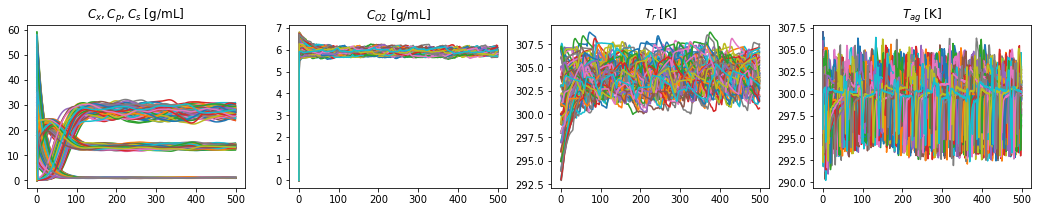

In [8]:
"""
N = 100
solutions_name = str(N) + "_solutions.npy"
F_ag_array_name = str(N) + "_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)

num_timesteps = 500
train_random_inputs = generate_inputs (N)
solutions, F_ag_array = generate_ode_data(train_random_inputs, num_timesteps)

print ("="*50)
print ("Saved: ")
print (f"{solutions_name}: {solutions.shape}")
print (f"{F_ag_array_name}: {F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, solutions_name), solutions)
np.save (join(save_dir, F_ag_array_name), F_ag_array)

# PLOT
plot_ode_solutions (solutions)
plot_input_output(F_ag_array, solutions, N)
"""

### Visualizing input and output sequences like the paper shows on page 104

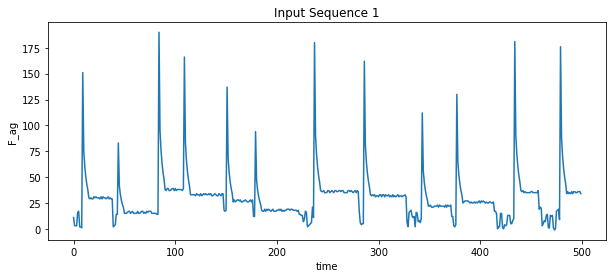

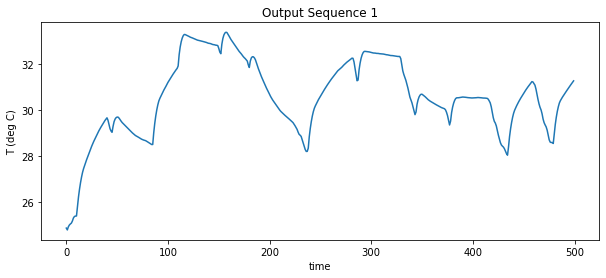

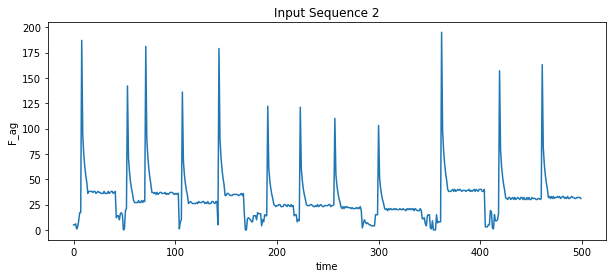

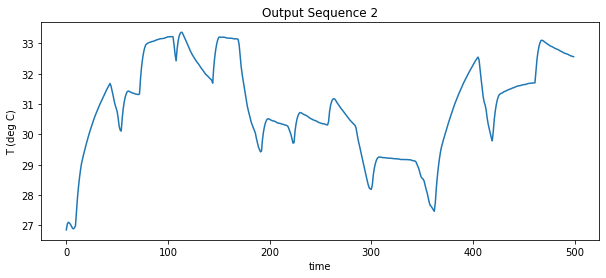

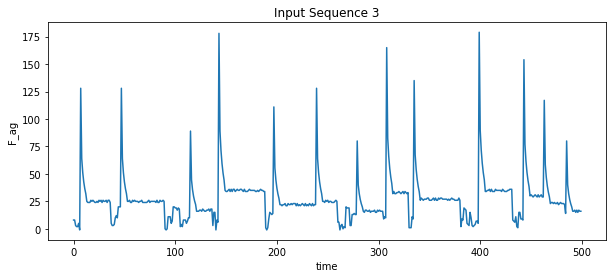

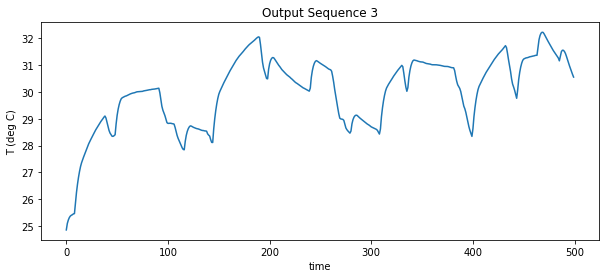

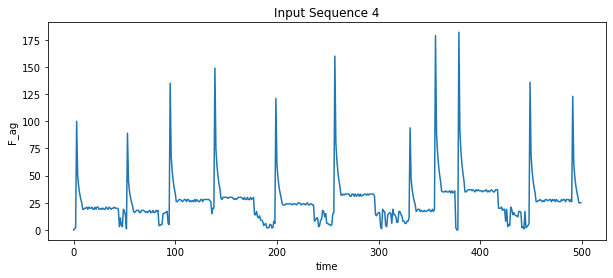

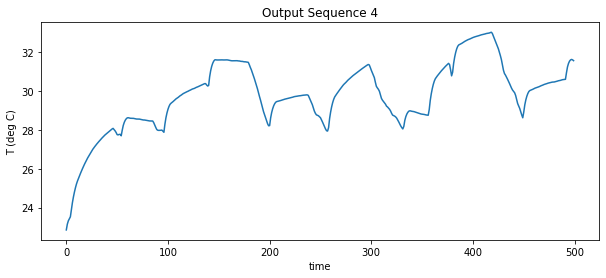

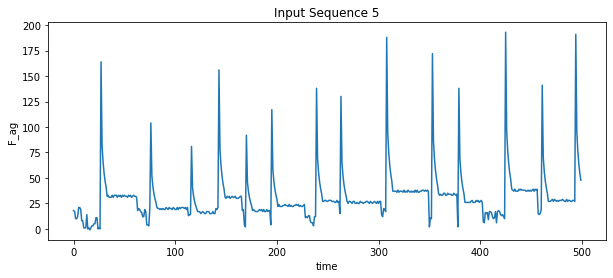

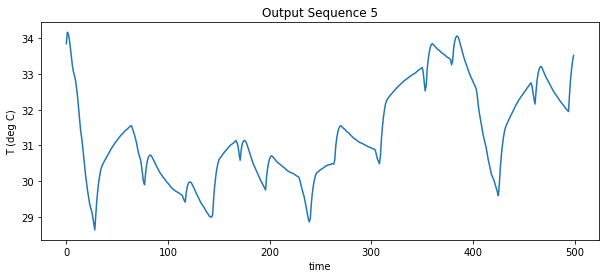

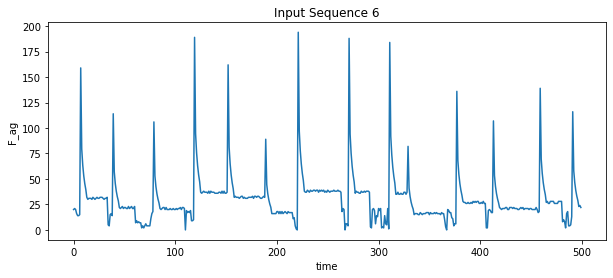

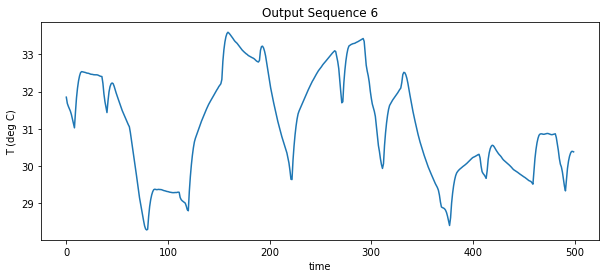

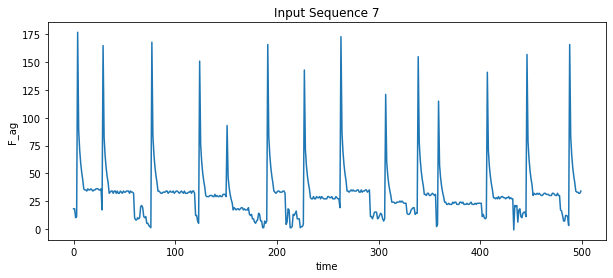

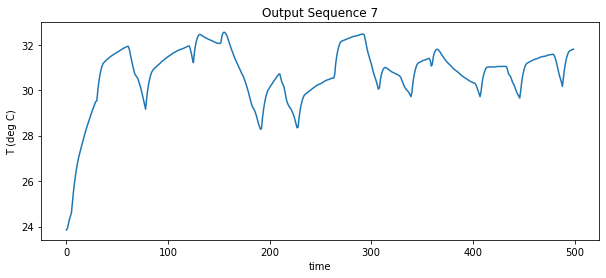

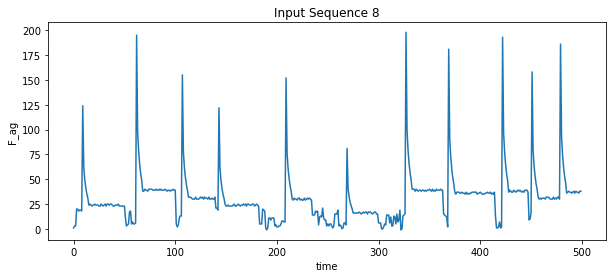

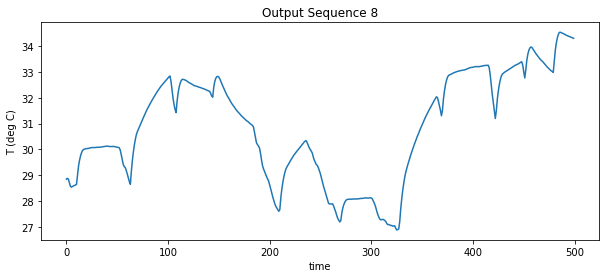

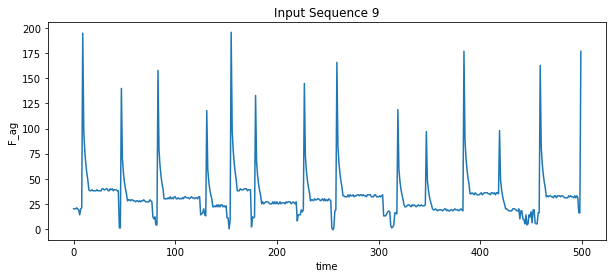

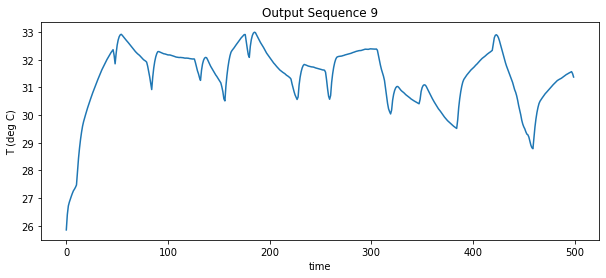

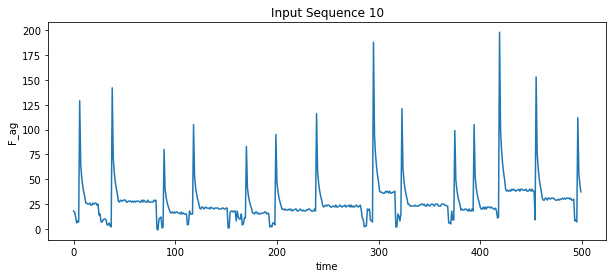

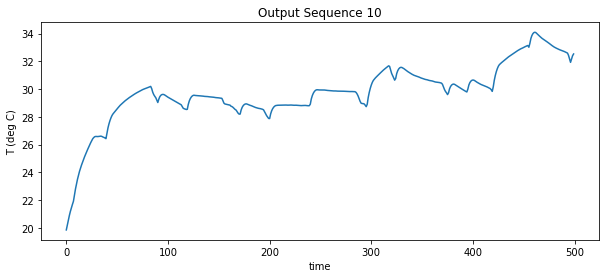

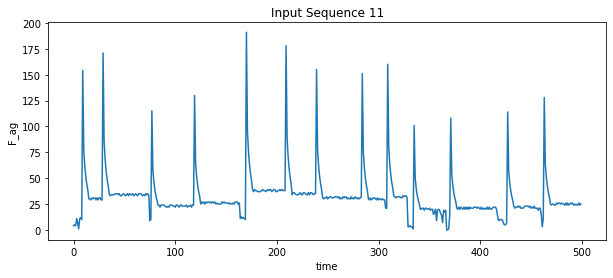

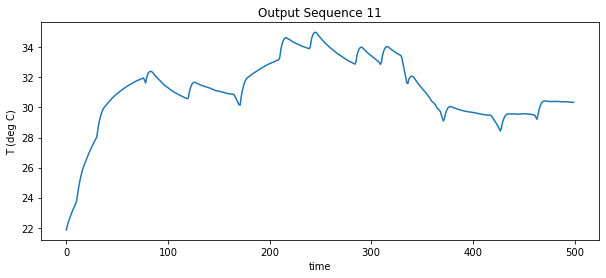

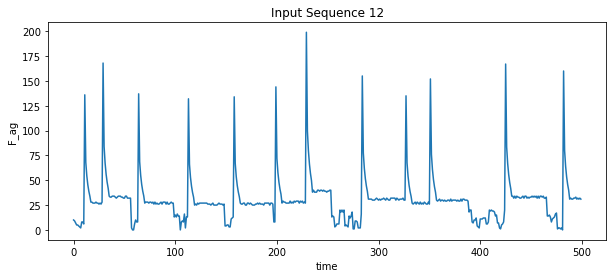

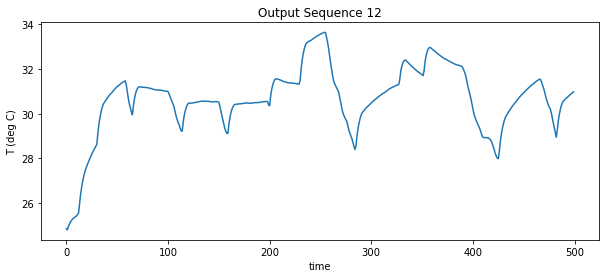

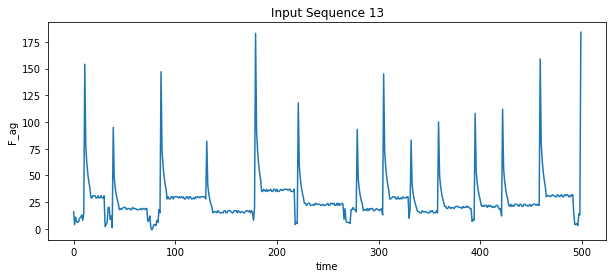

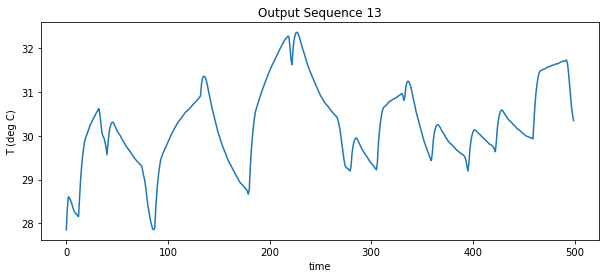

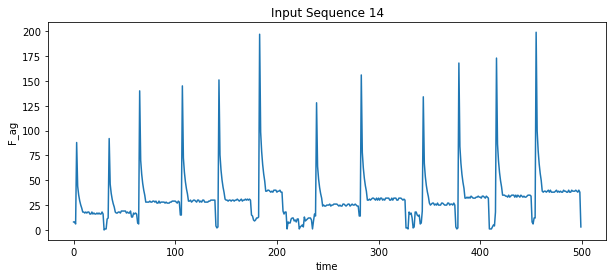

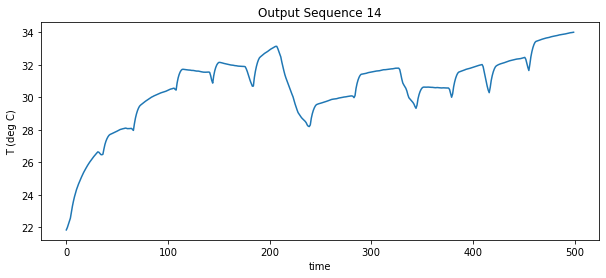

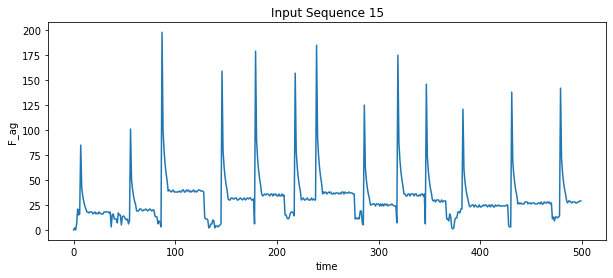

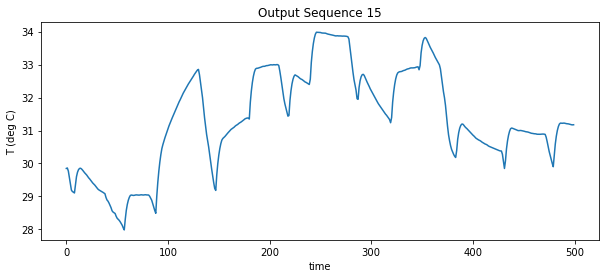

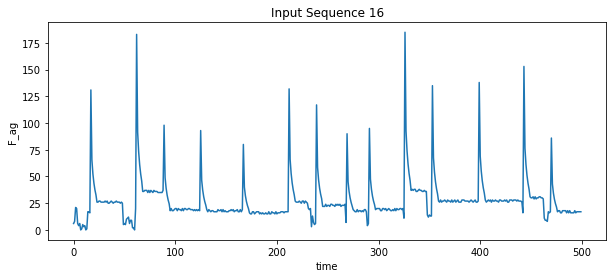

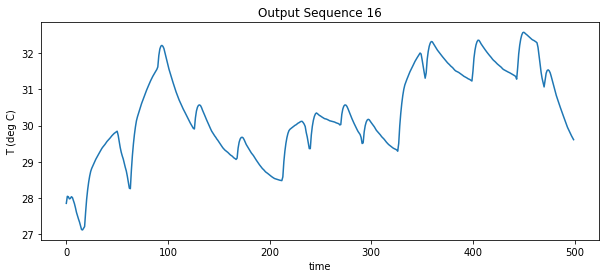

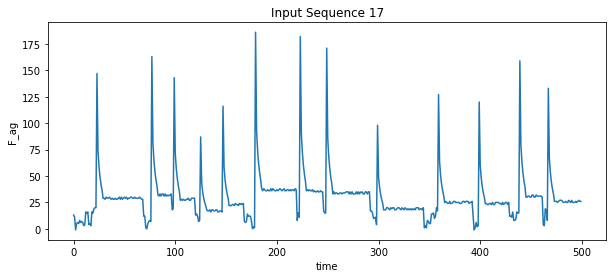

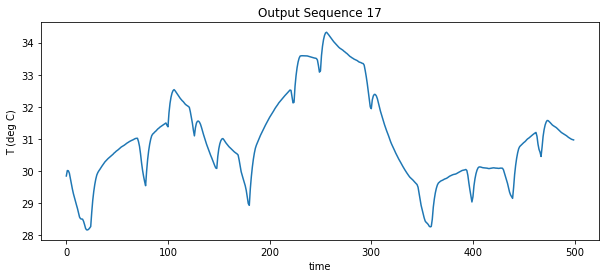

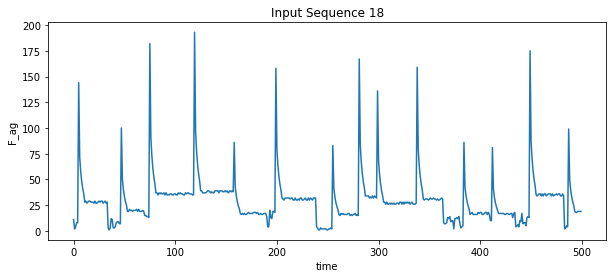

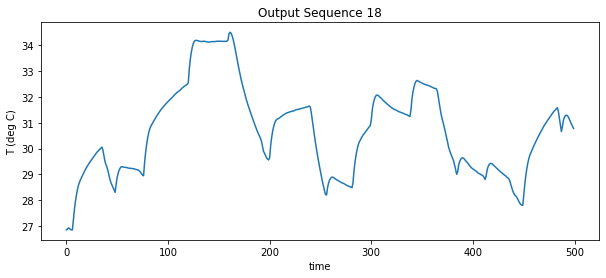

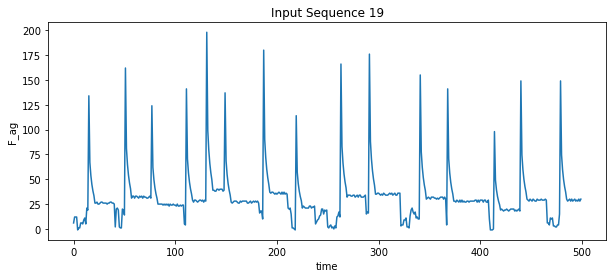

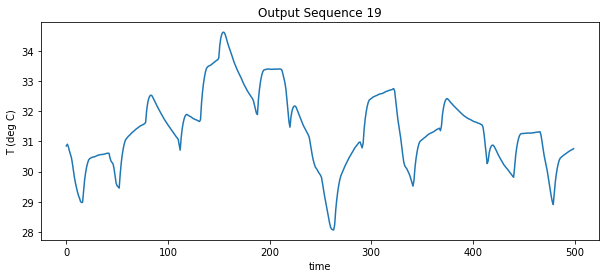

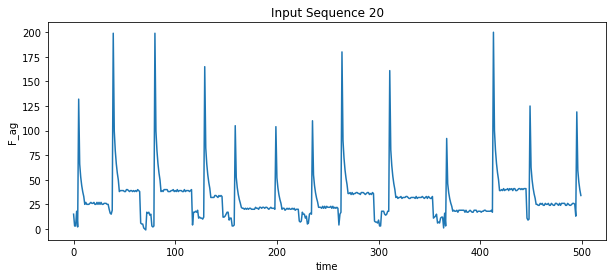

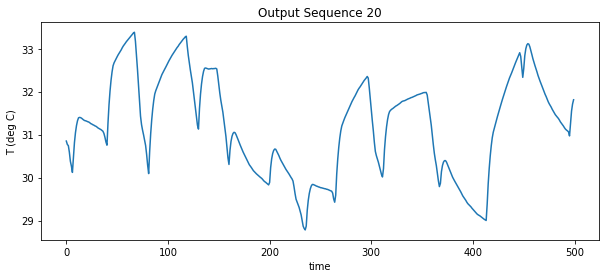

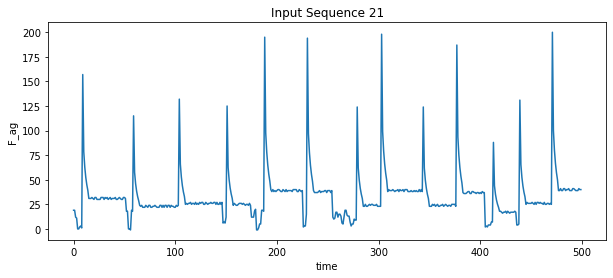

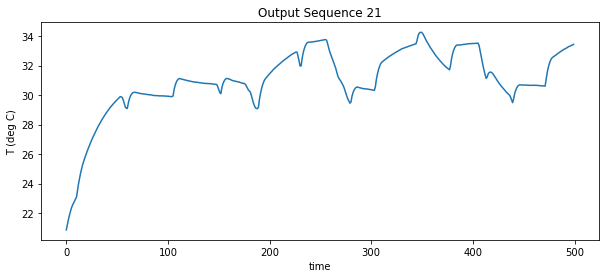

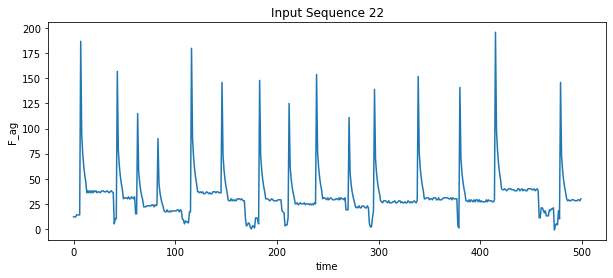

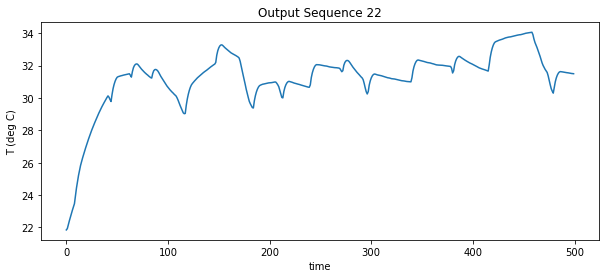

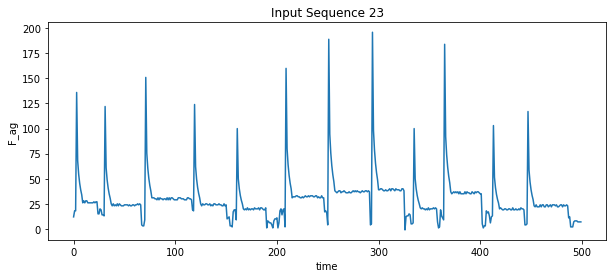

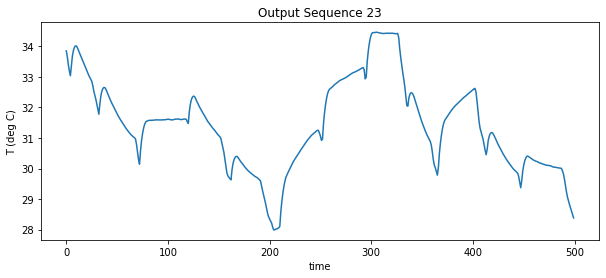

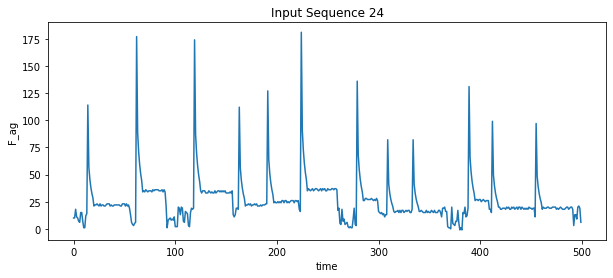

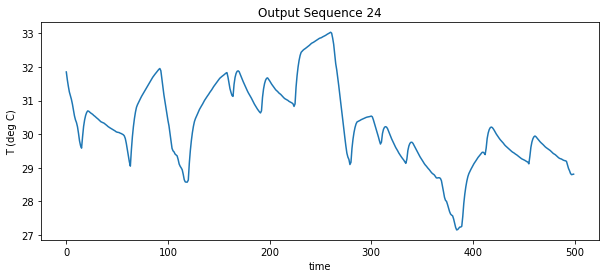

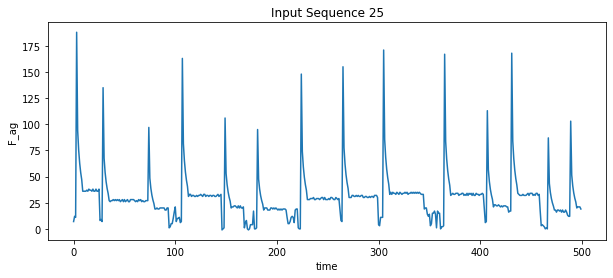

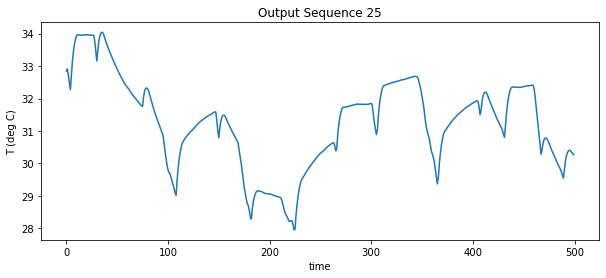

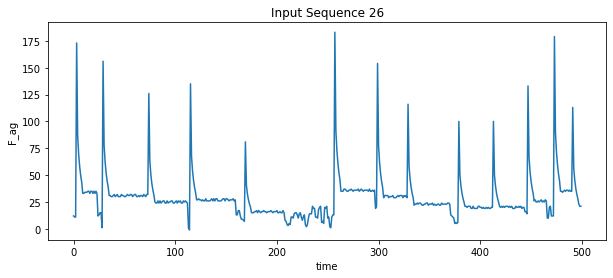

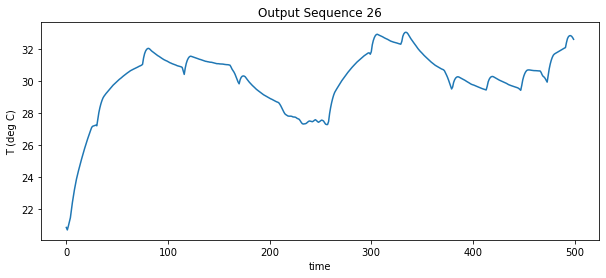

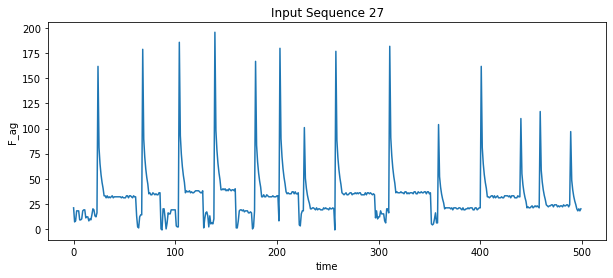

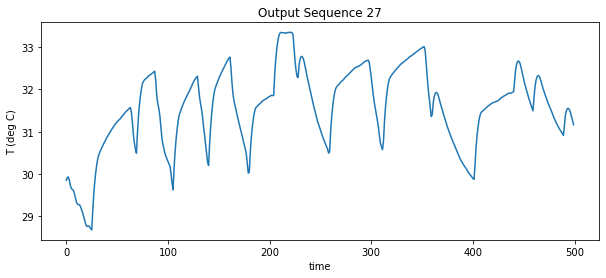

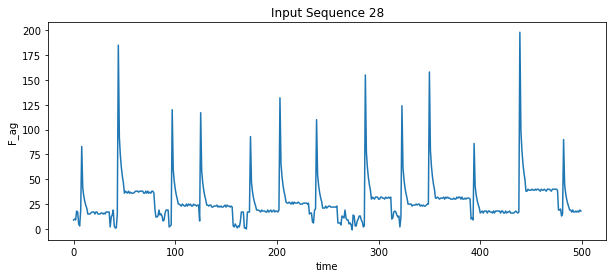

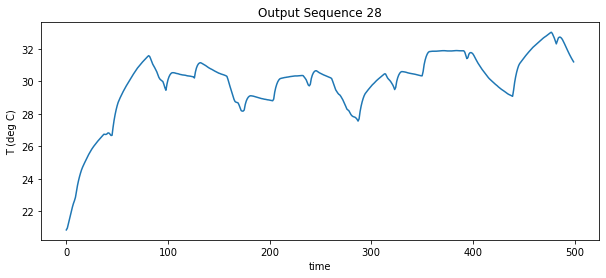

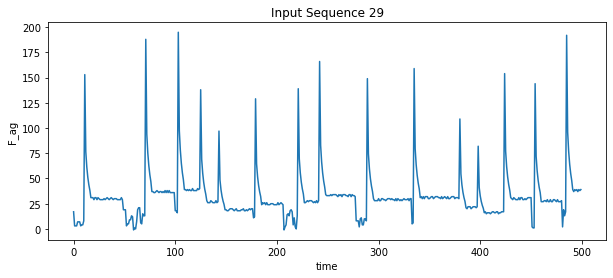

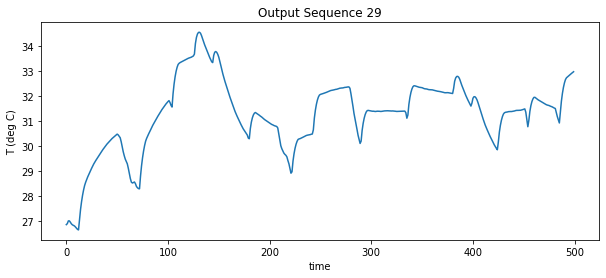

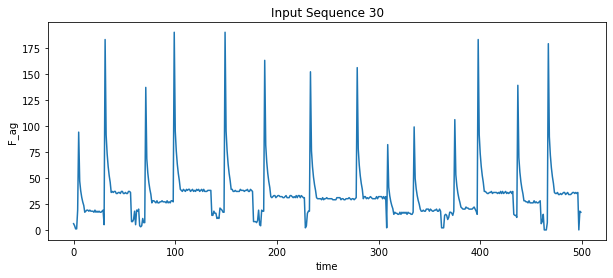

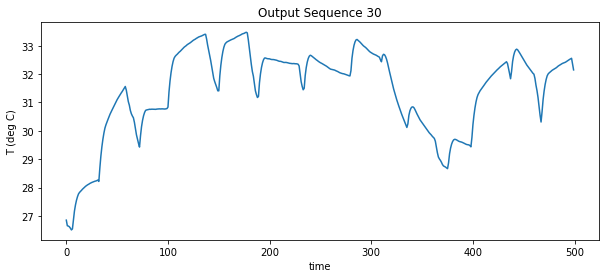

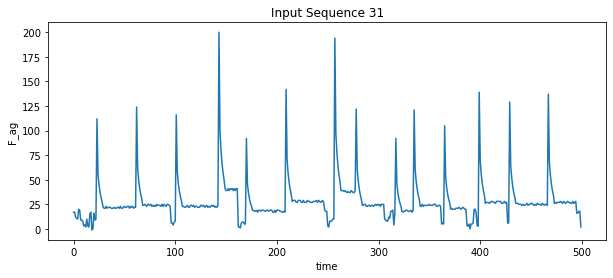

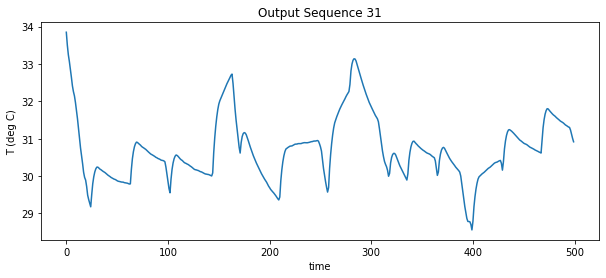

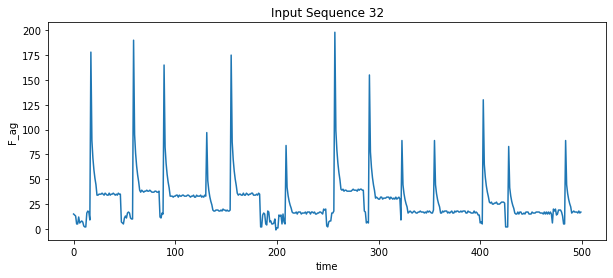

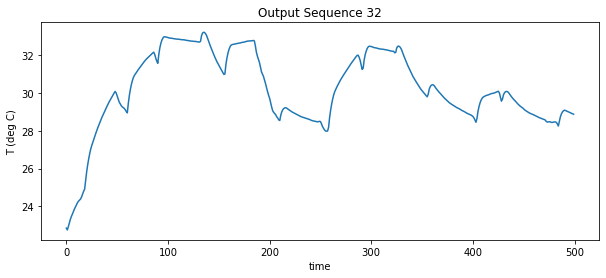

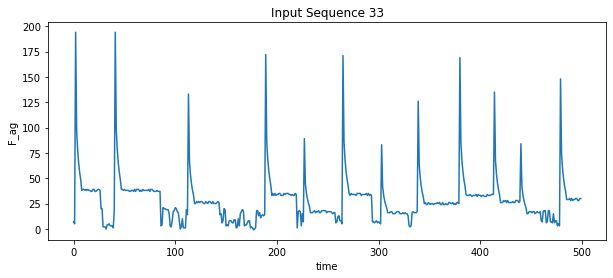

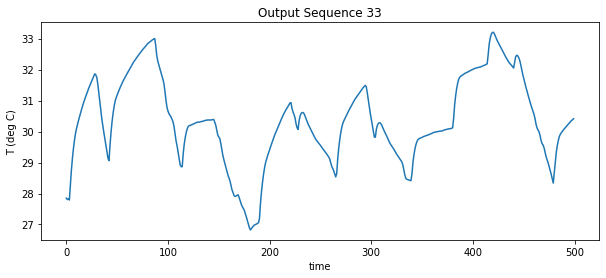

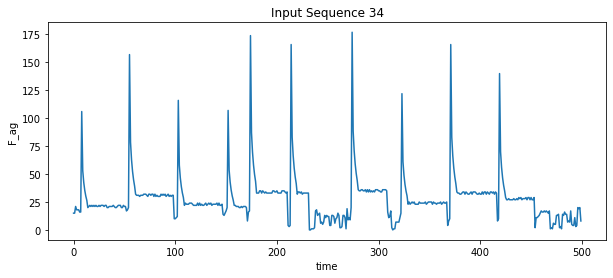

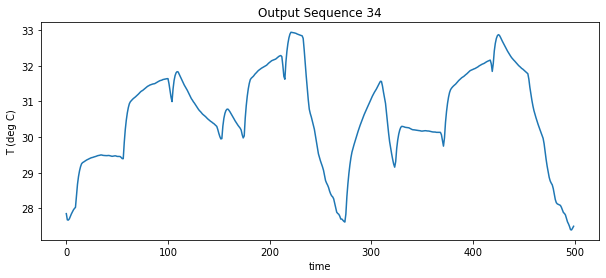

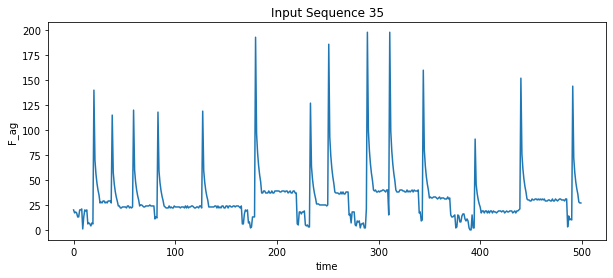

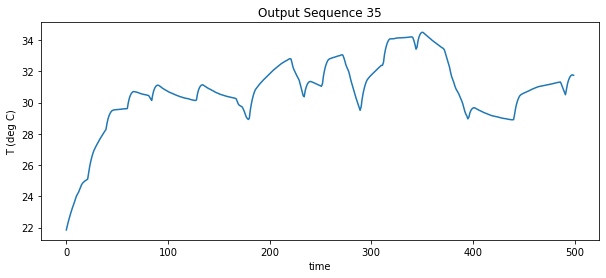

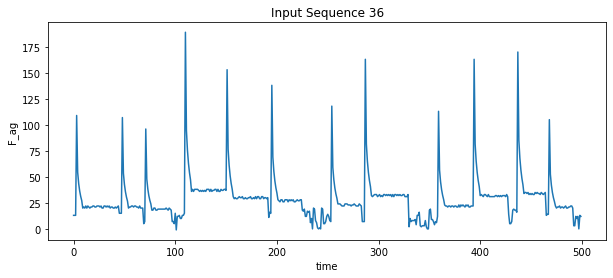

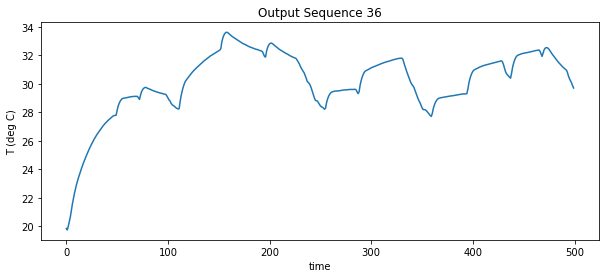

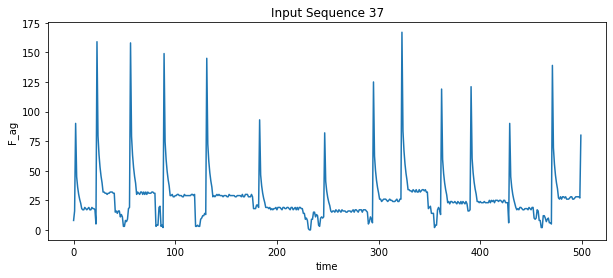

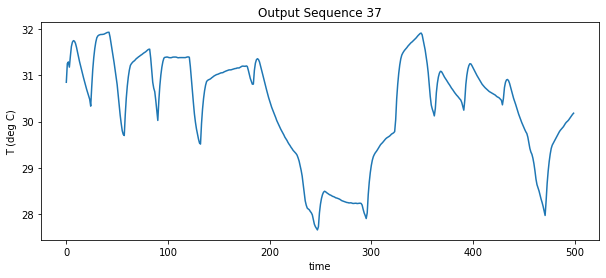

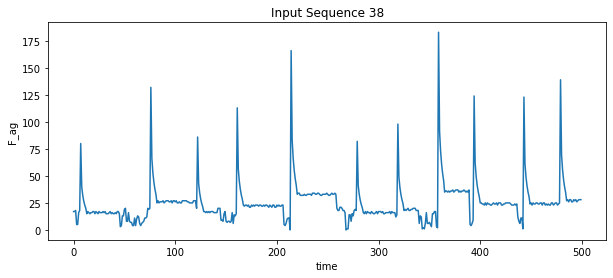

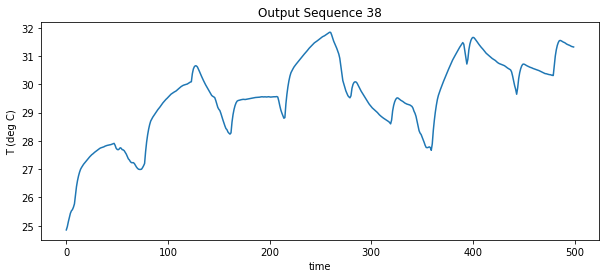

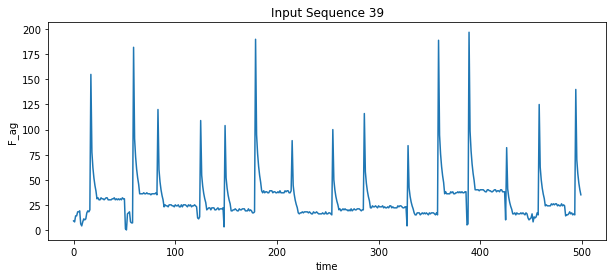

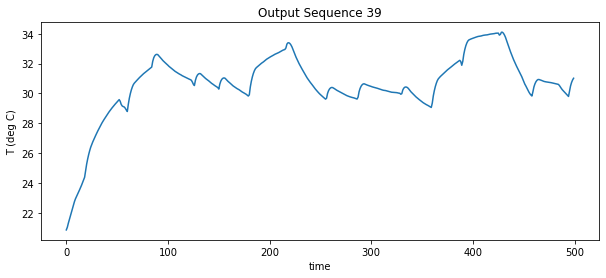

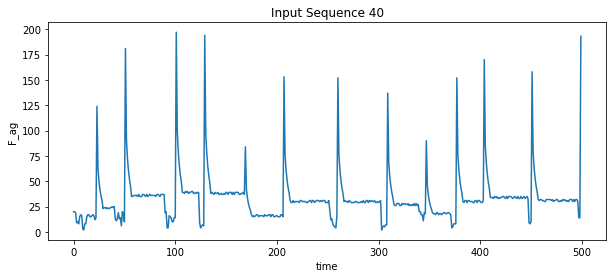

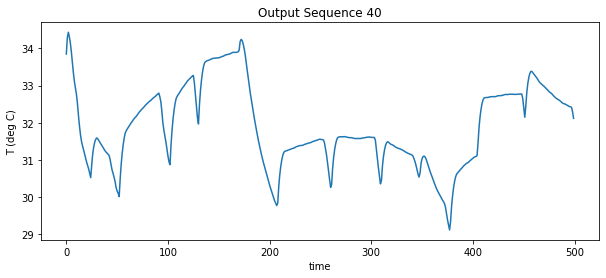

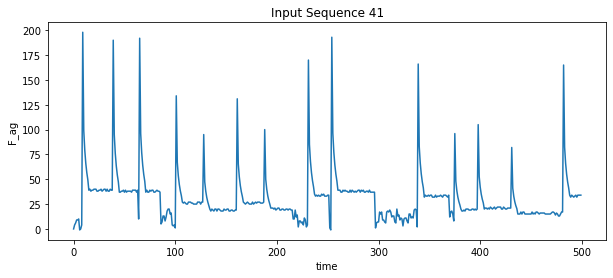

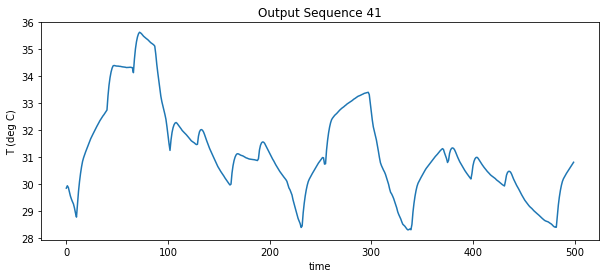

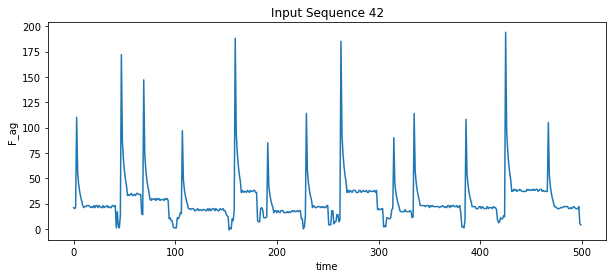

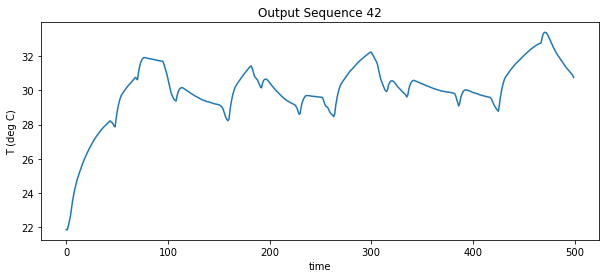

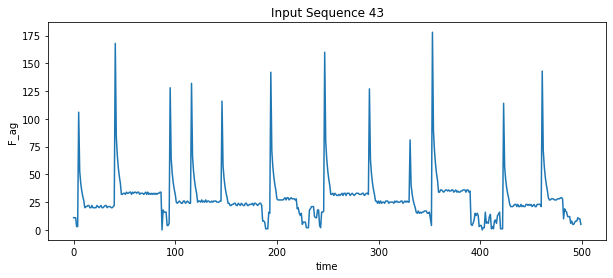

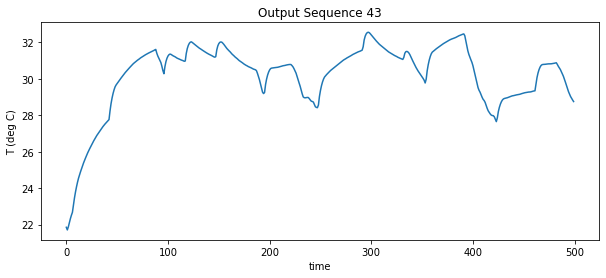

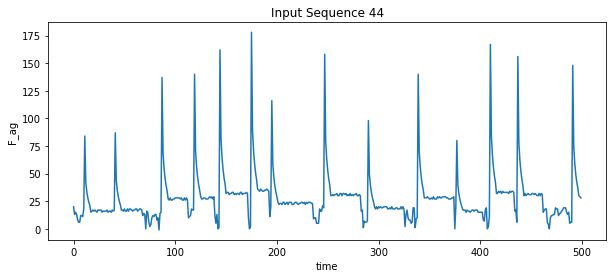

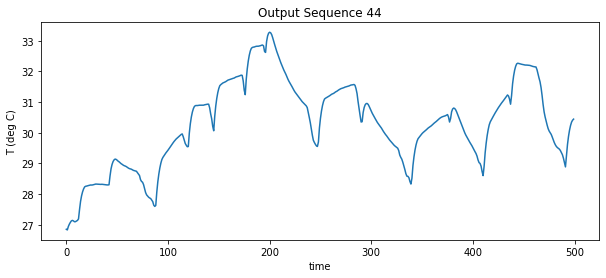

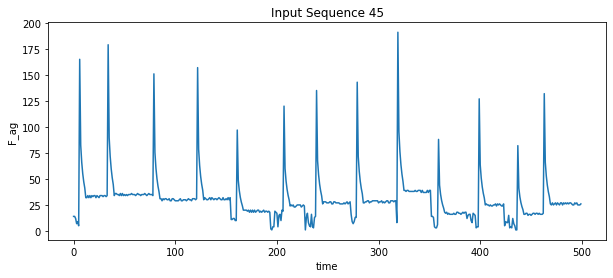

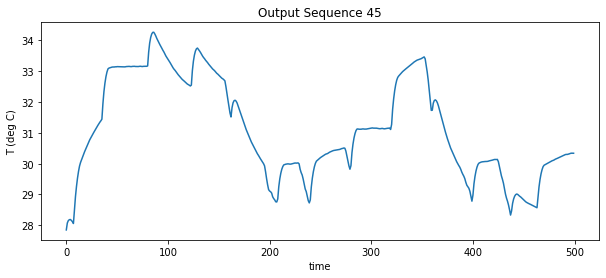

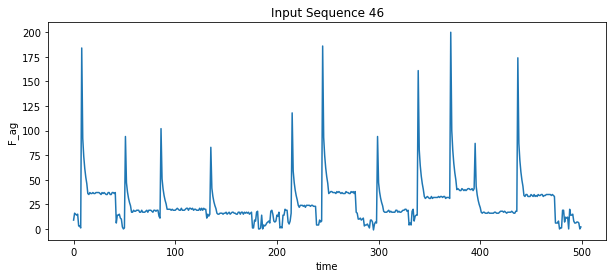

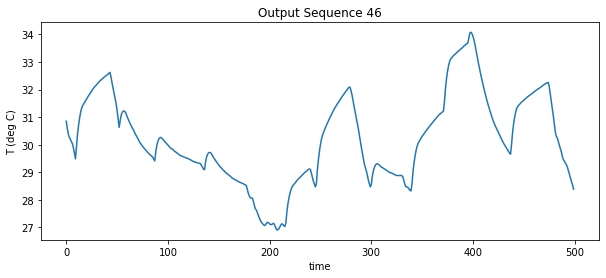

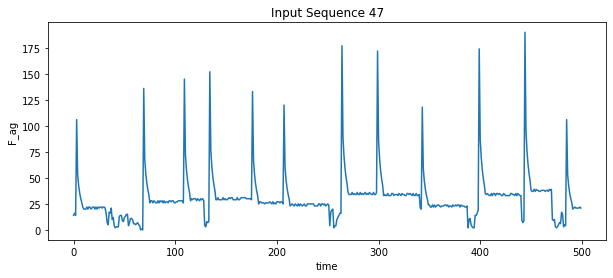

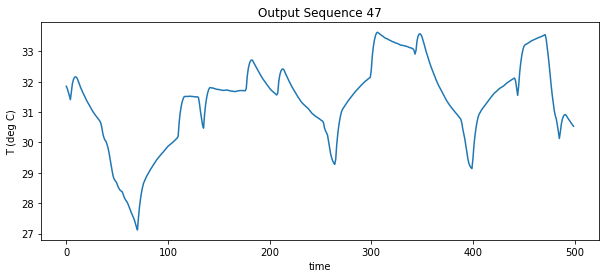

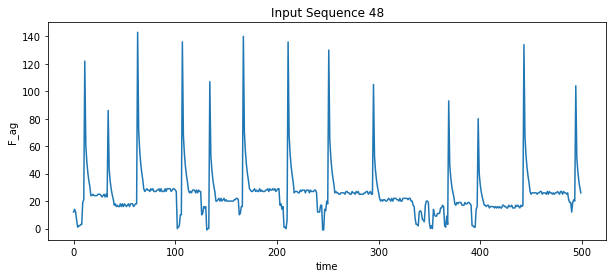

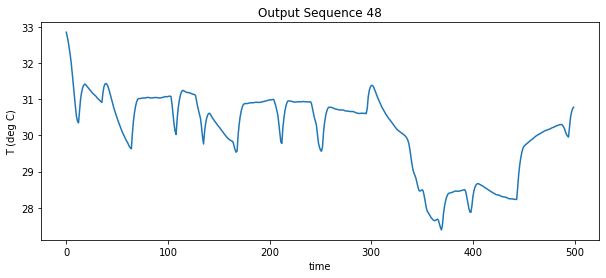

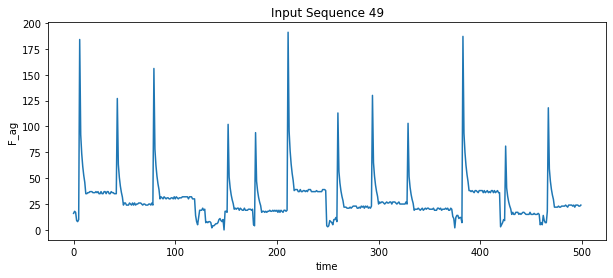

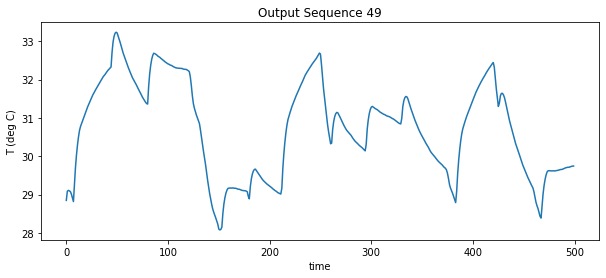

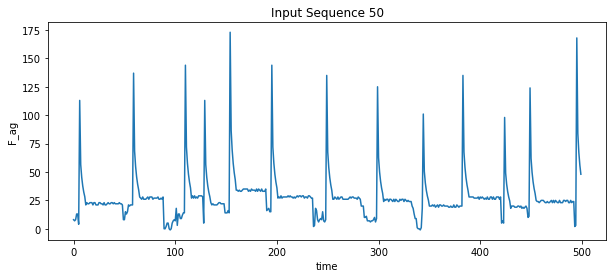

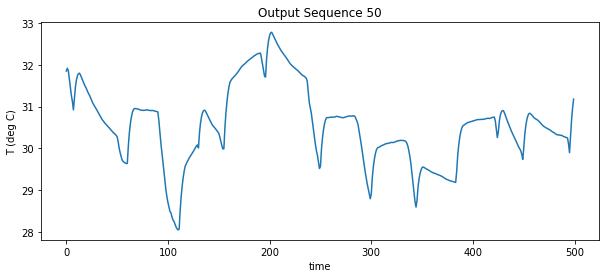

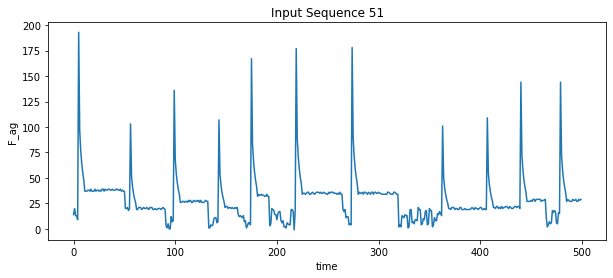

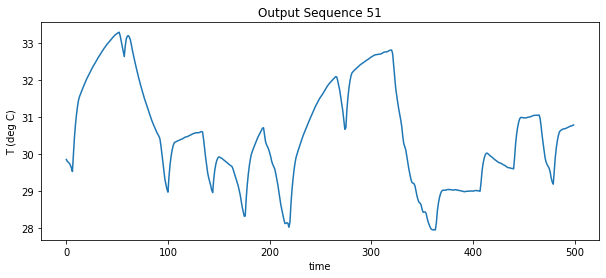

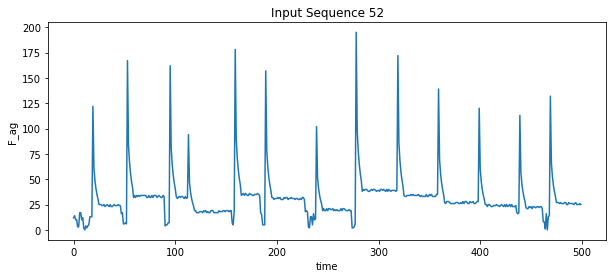

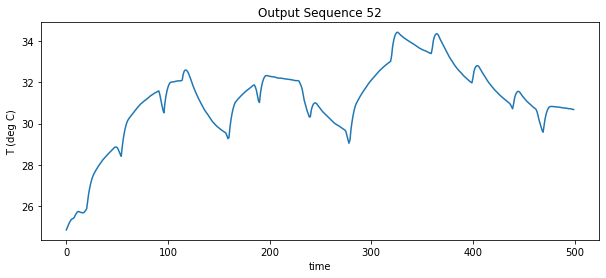

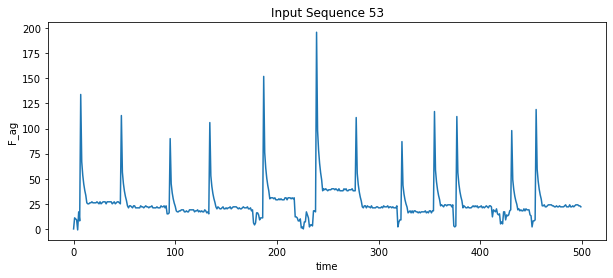

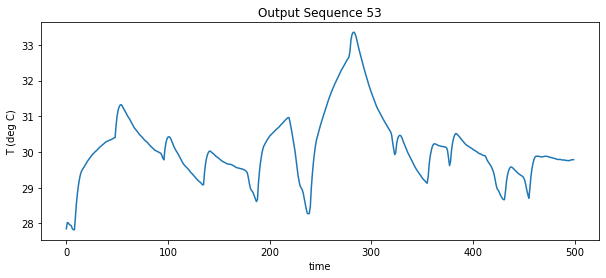

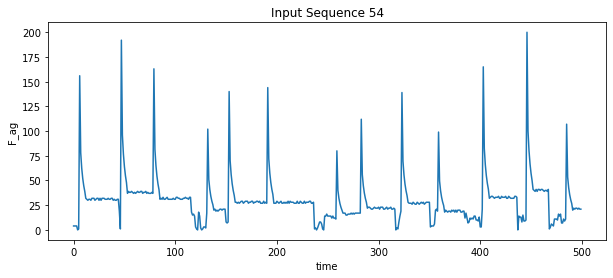

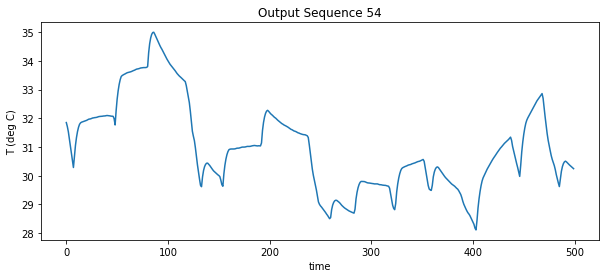

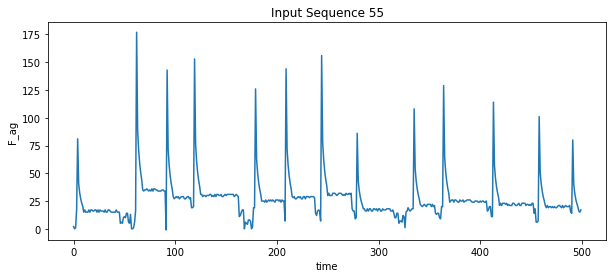

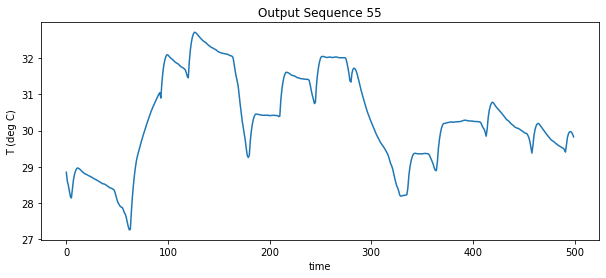

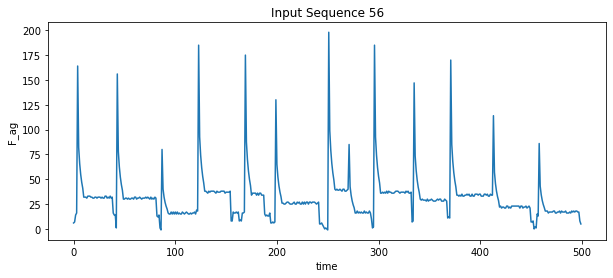

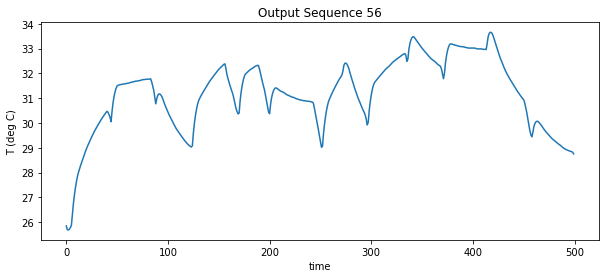

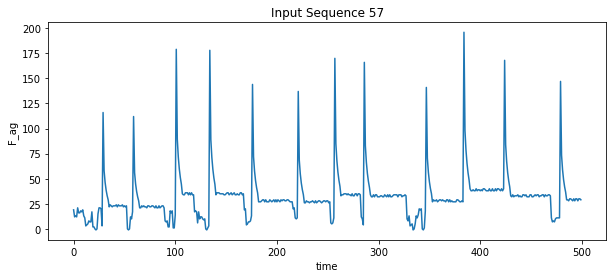

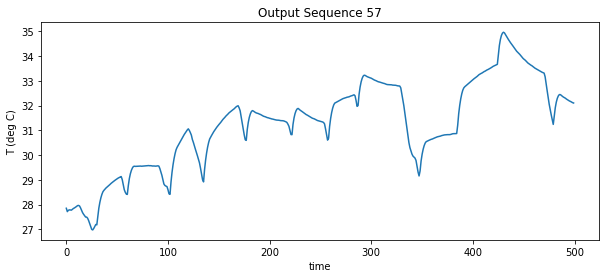

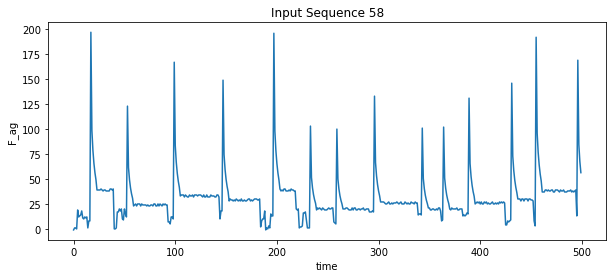

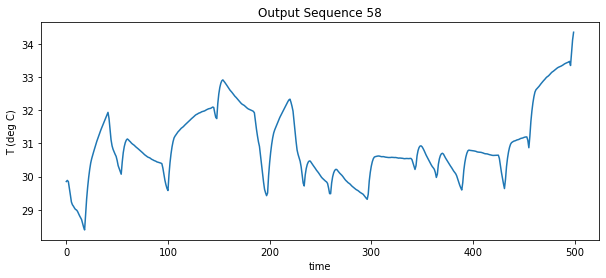

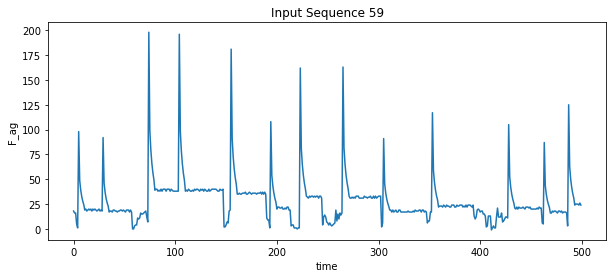

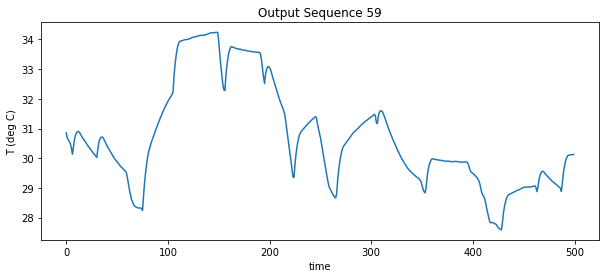

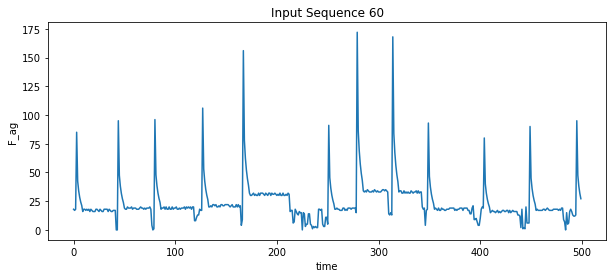

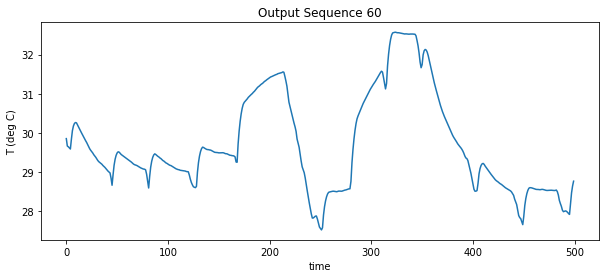

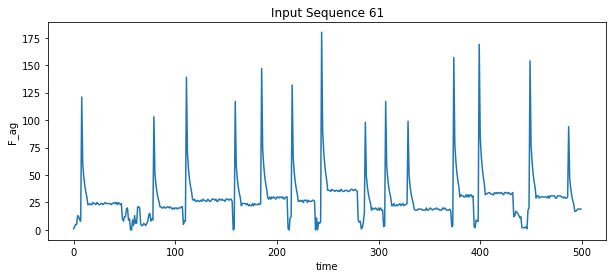

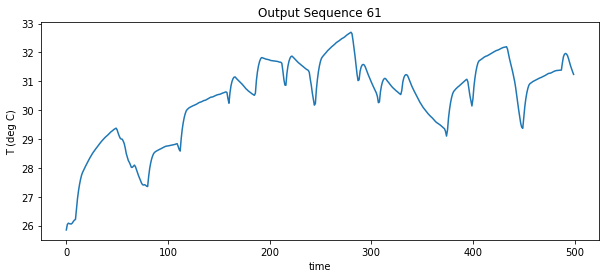

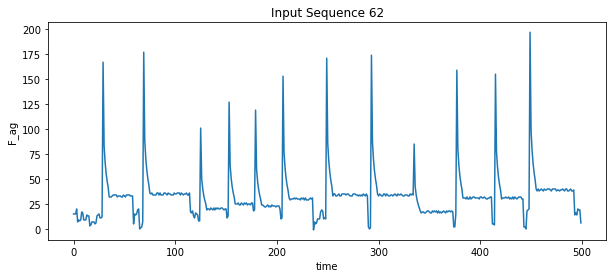

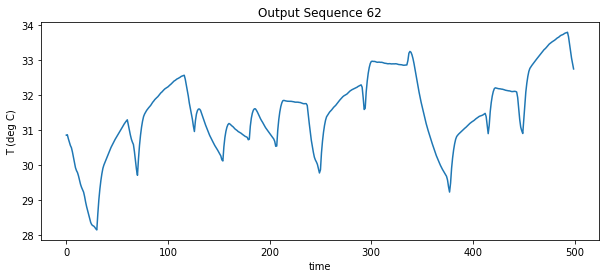

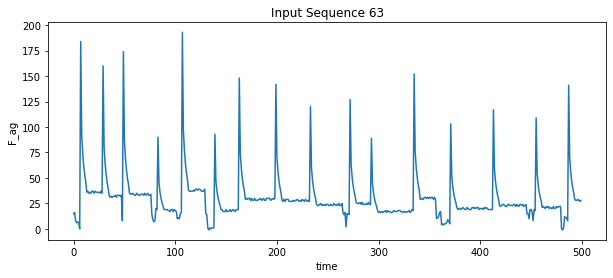

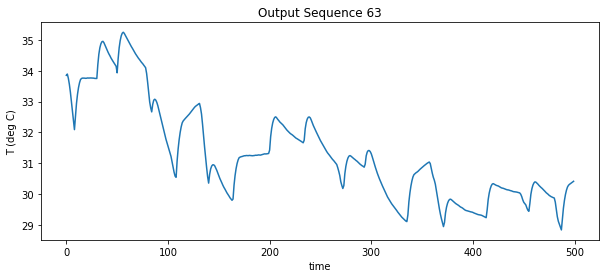

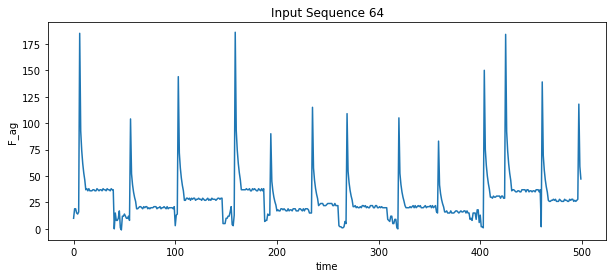

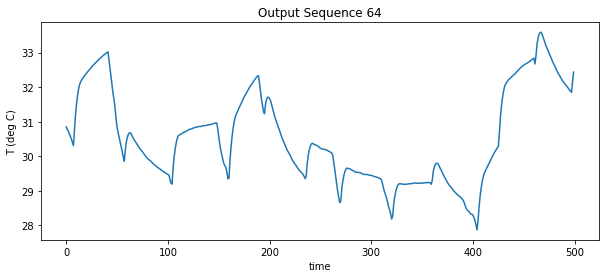

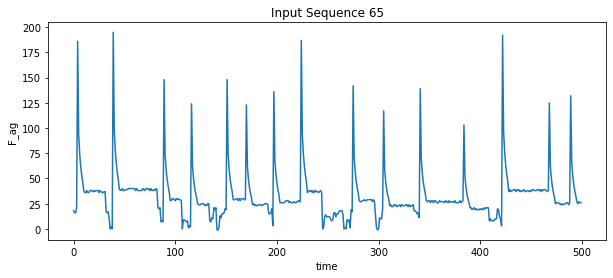

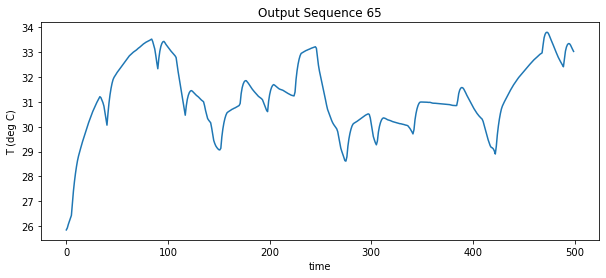

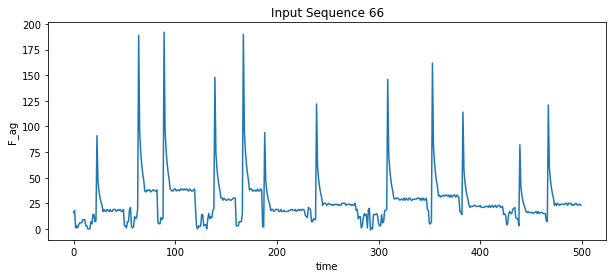

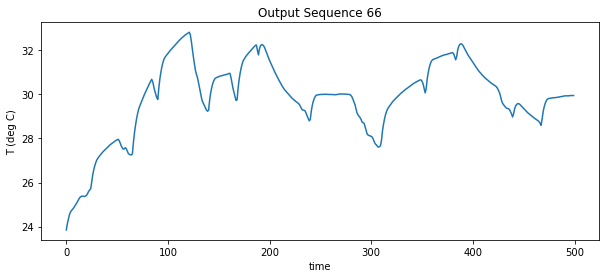

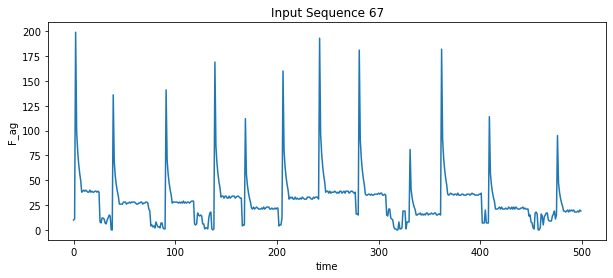

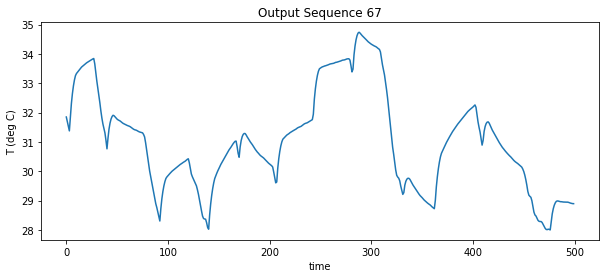

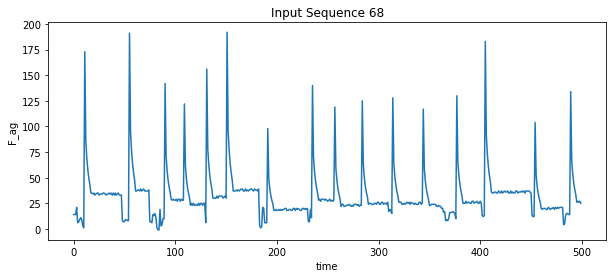

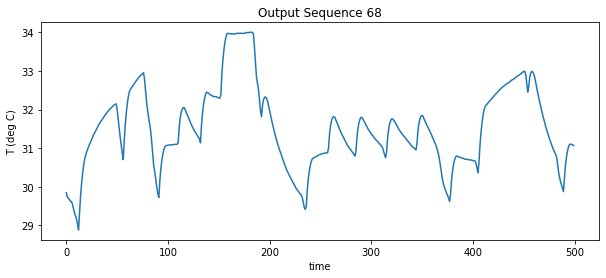

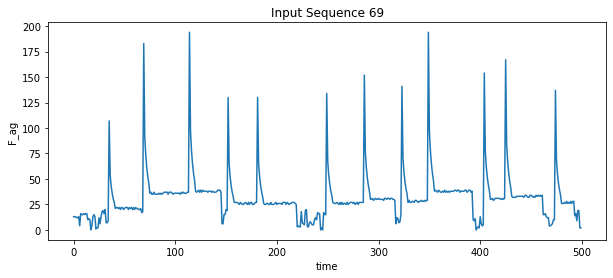

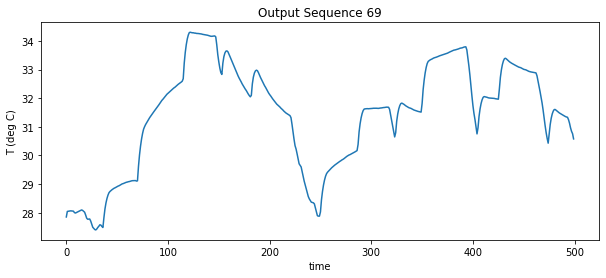

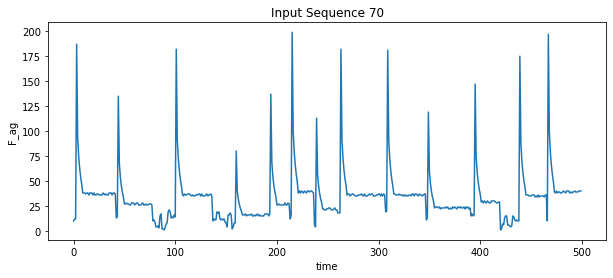

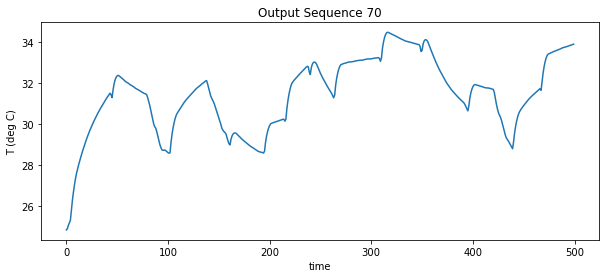

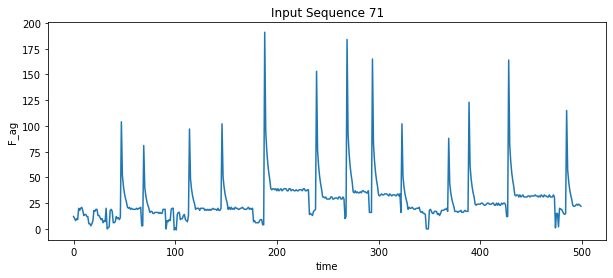

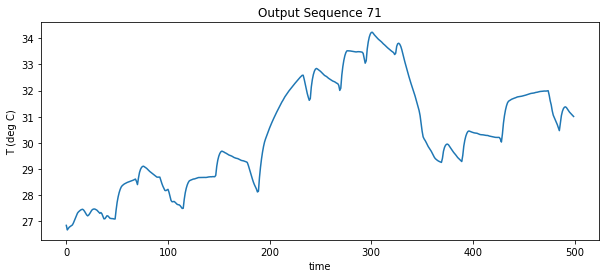

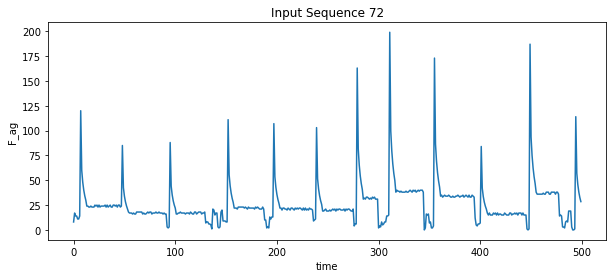

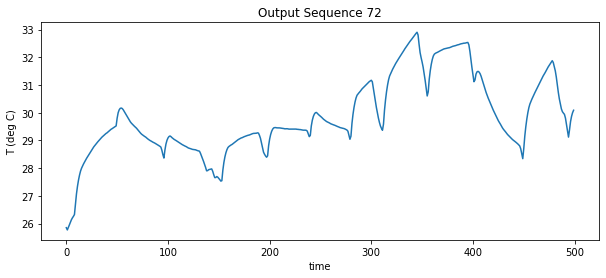

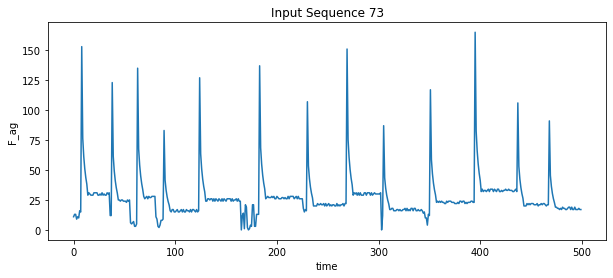

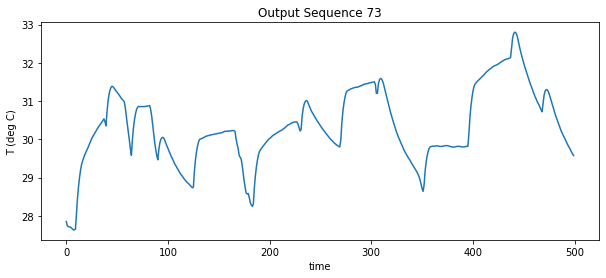

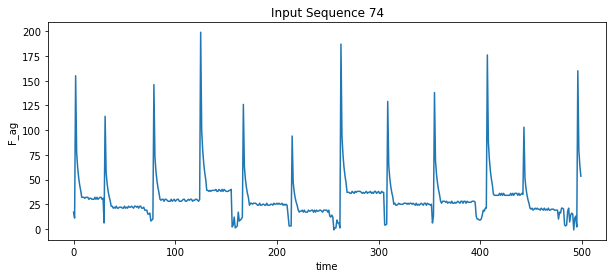

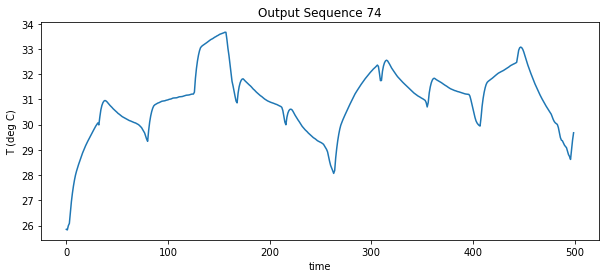

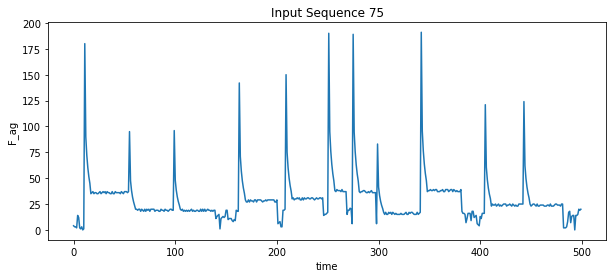

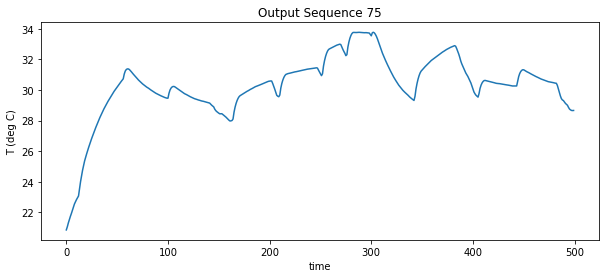

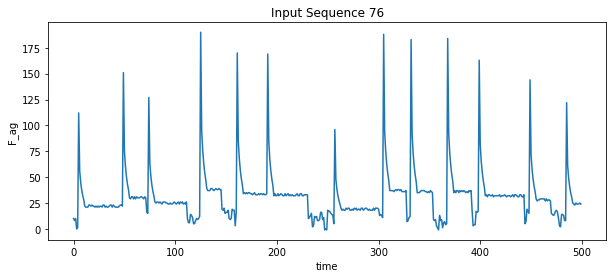

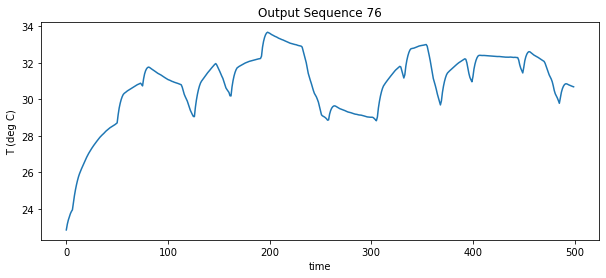

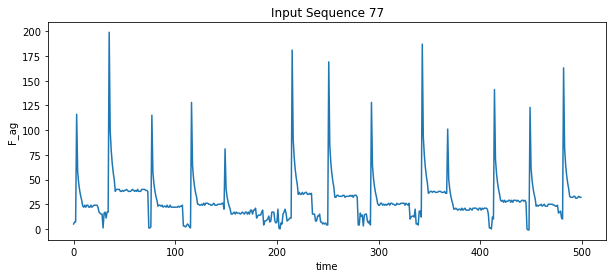

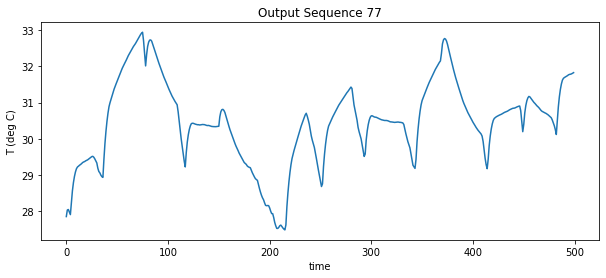

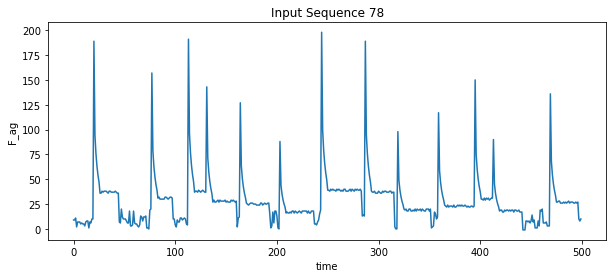

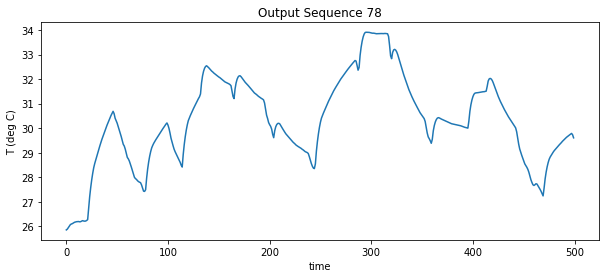

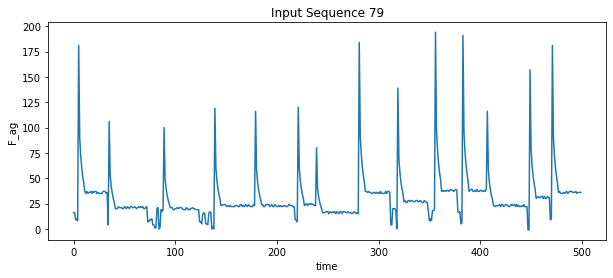

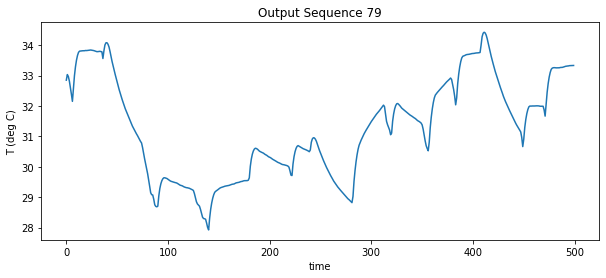

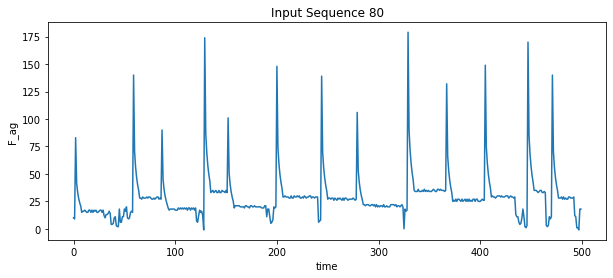

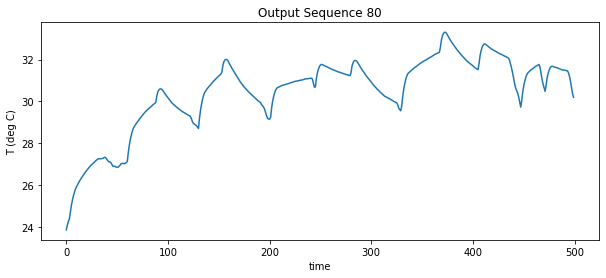

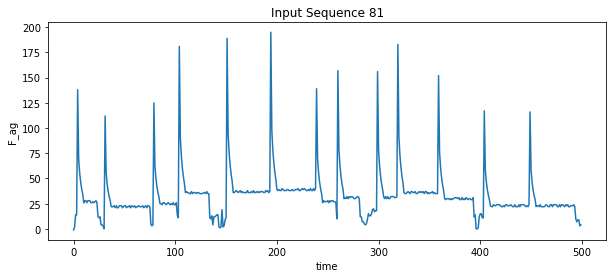

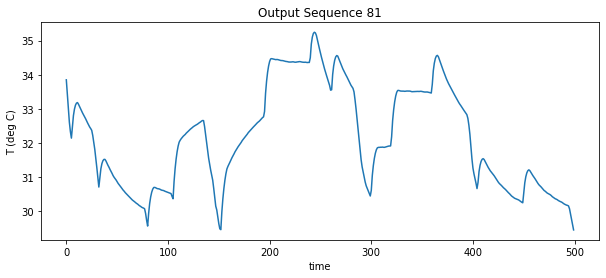

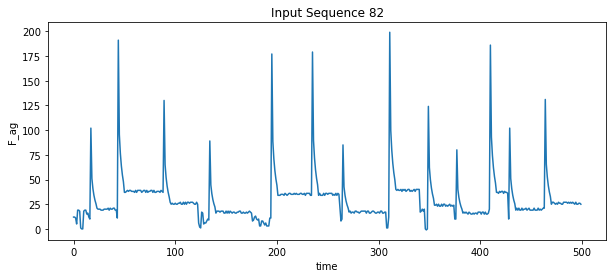

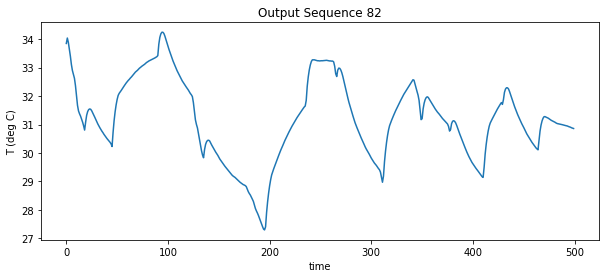

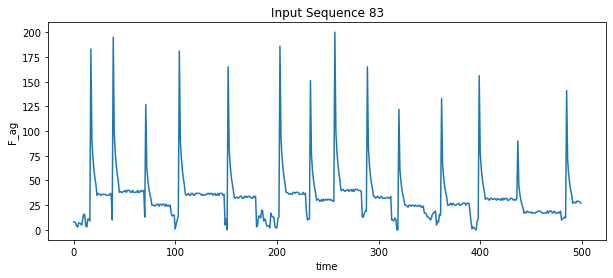

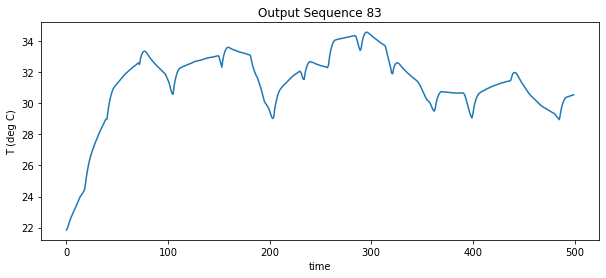

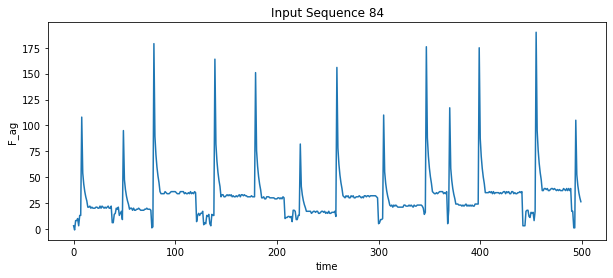

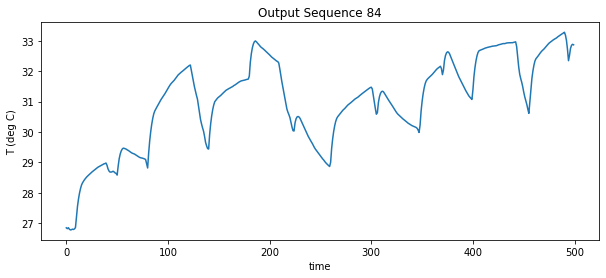

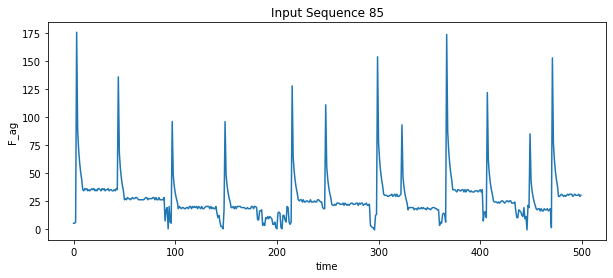

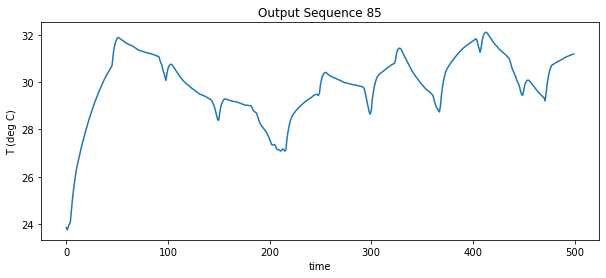

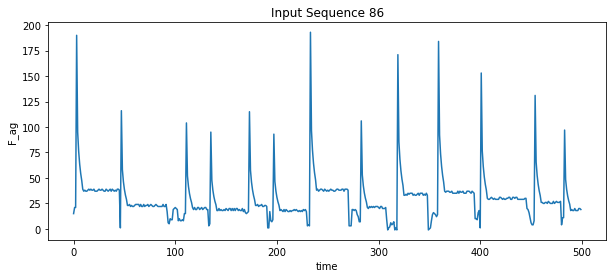

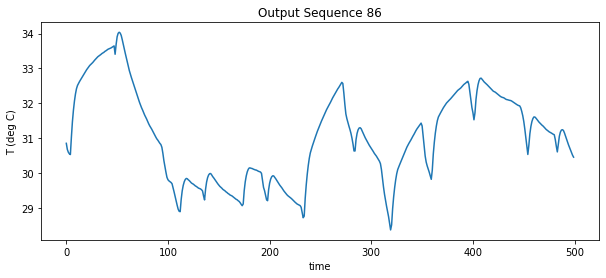

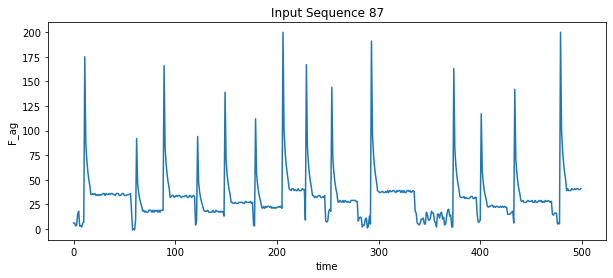

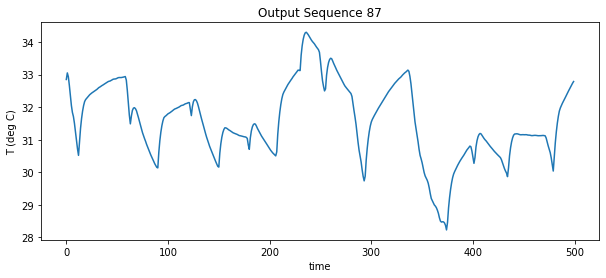

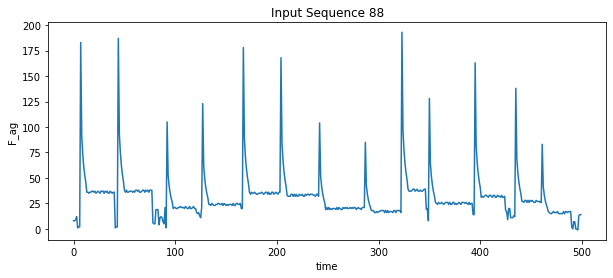

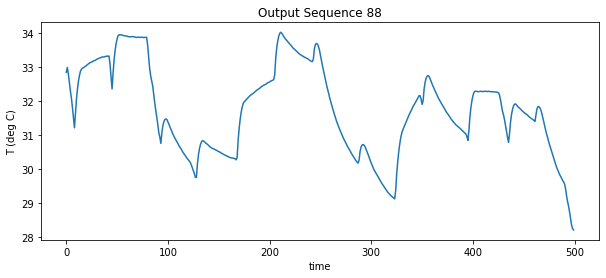

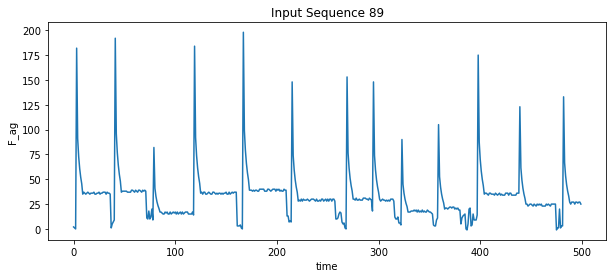

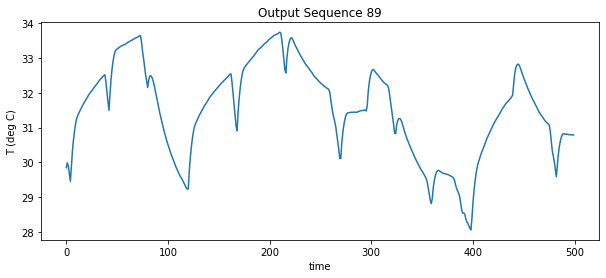

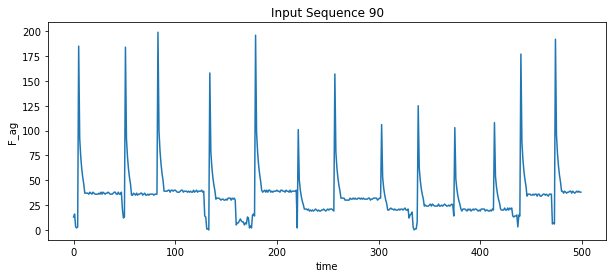

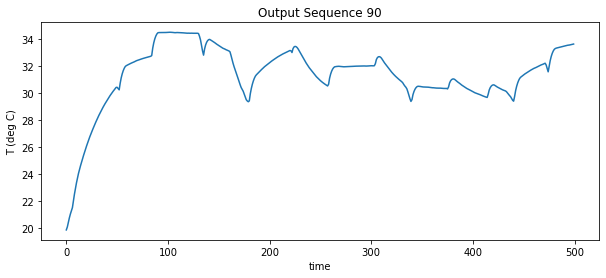

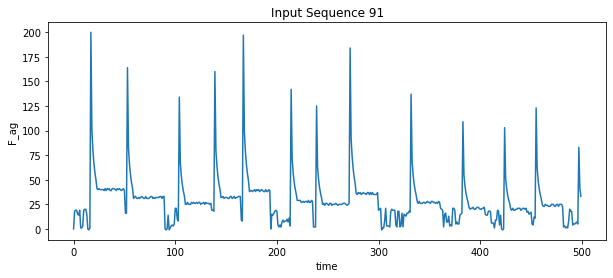

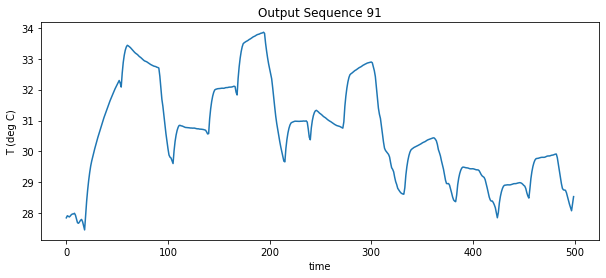

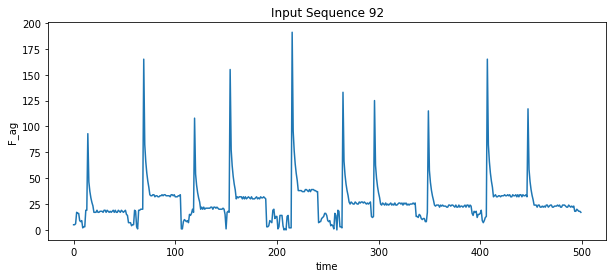

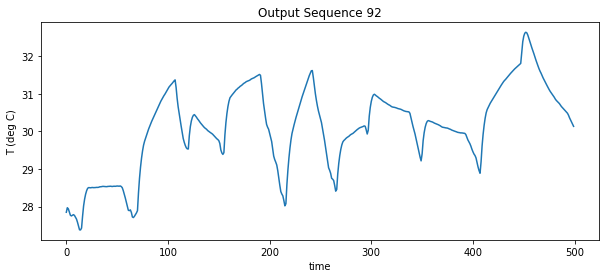

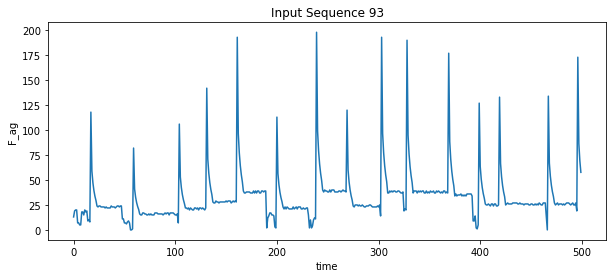

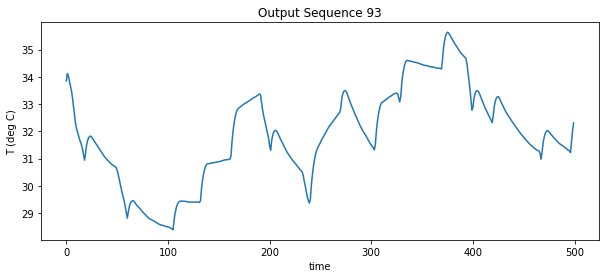

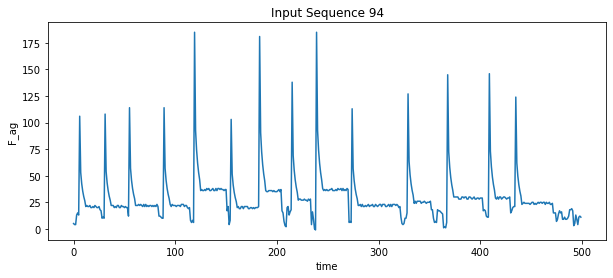

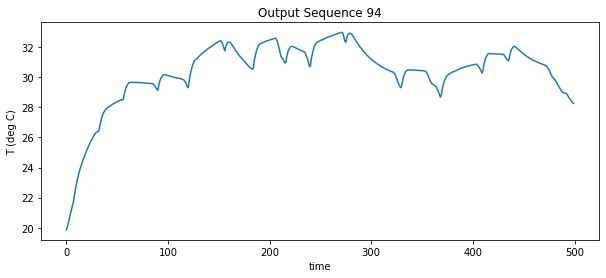

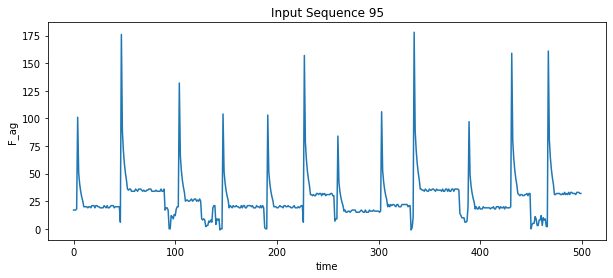

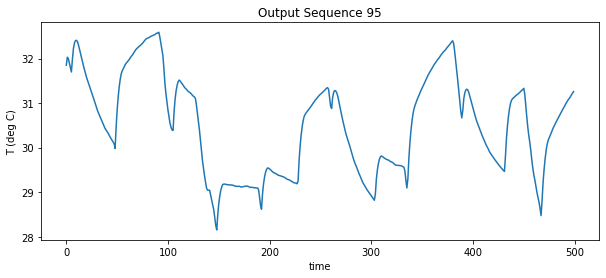

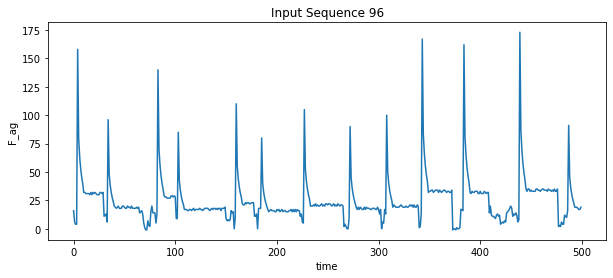

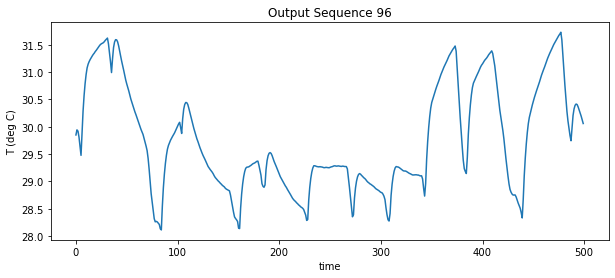

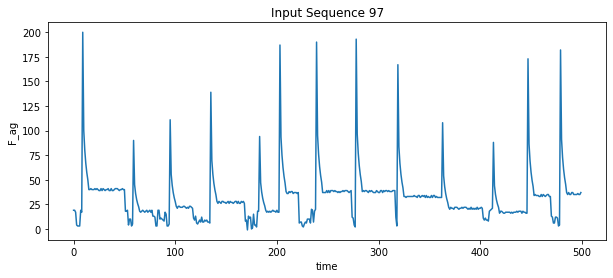

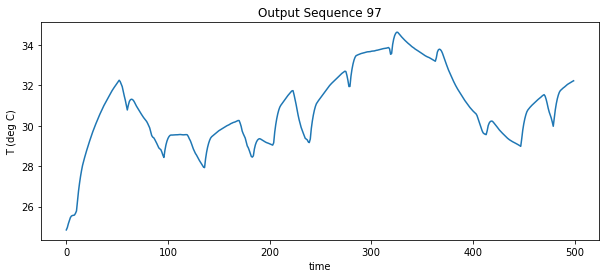

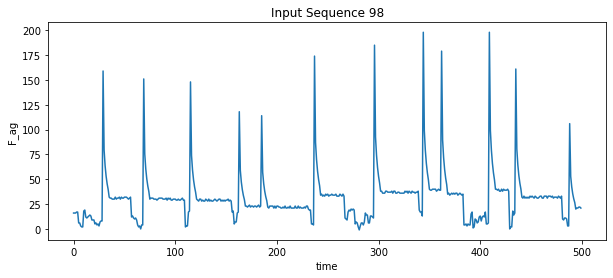

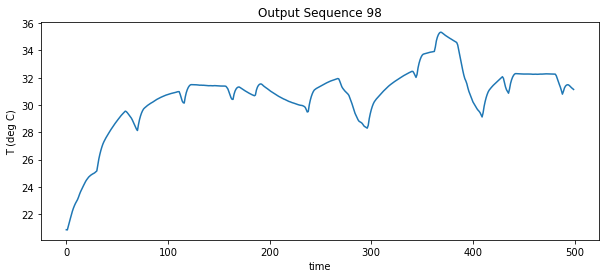

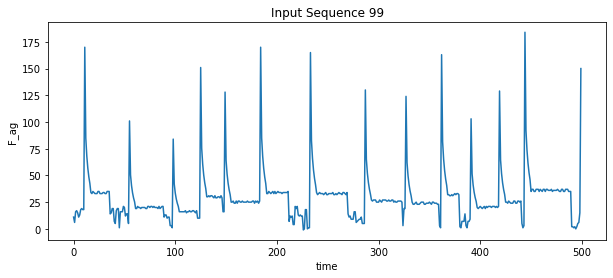

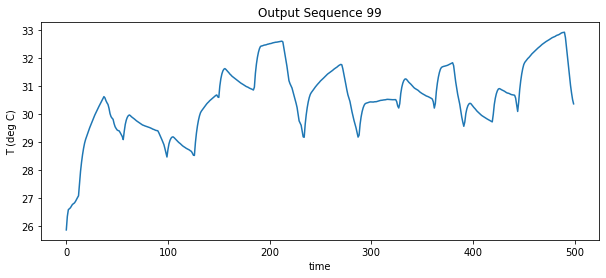

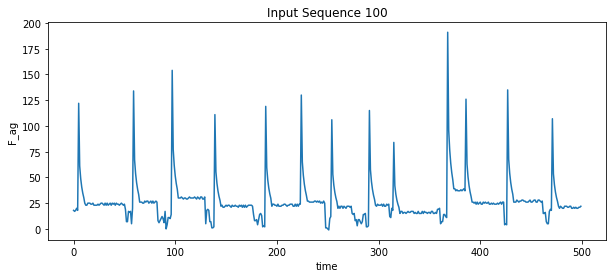

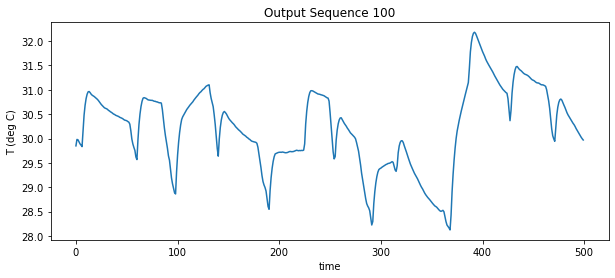

In [9]:
plot_input_output(F_ag_array, solutions, N)

pre-processing data... with N =  100
preprocessing done
Epoch 0 | Epoch mean loss = 28.434005502252727
Epoch 2 | Epoch mean loss = 12.151526966977762
Epoch 4 | Epoch mean loss = 8.471669455497722
Epoch 6 | Epoch mean loss = 6.850145064975832
Epoch 8 | Epoch mean loss = 5.930875957407058
Epoch 10 | Epoch mean loss = 5.342265912176308
Epoch 12 | Epoch mean loss = 4.943303691639678
Epoch 14 | Epoch mean loss = 4.651899104918366
Epoch 16 | Epoch mean loss = 4.4128739364083005
Epoch 18 | Epoch mean loss = 4.253993100930369


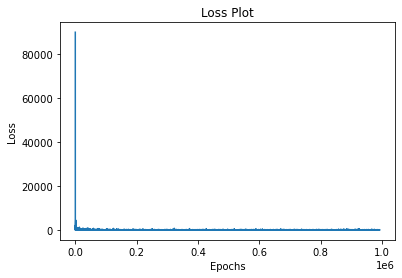

In [10]:
solutions_w_F_ag = np.concatenate((solutions, F_ag_array.reshape(N,1,num_timesteps)), axis=1)
# print(solutions_w_F_ag.shape)
train_data = data_preprocessing(solutions_w_F_ag, N = N, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
print("preprocessing done")

model = NeuralNet(num_hidden_layers = 2, input_size = 8, hidden_size = 64, output_size = 1)#, device = device)
train(model, train_data, optimizer = "Adam", num_epochs = 20)

### Testing the NN

num_timesteps = 500
1/10
ODE solution found: True
2/10
ODE solution found: True
3/10
ODE solution found: True
4/10
ODE solution found: True
5/10
ODE solution found: True
6/10
ODE solution found: True
7/10
ODE solution found: True
8/10
ODE solution found: True
9/10
ODE solution found: True
10/10
ODE solution found: True
Saved: 
10test_solutions.npy: (10, 6, 500)
10test_F_ag.npy: (10, 500)


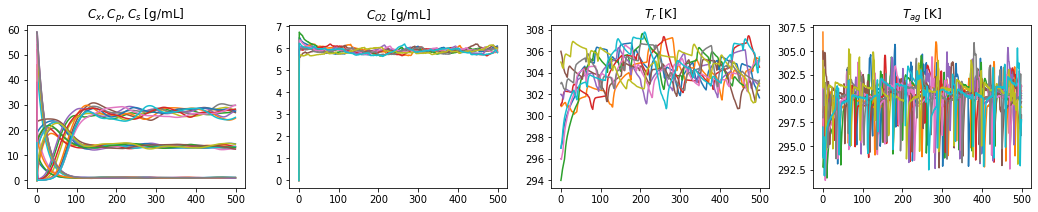

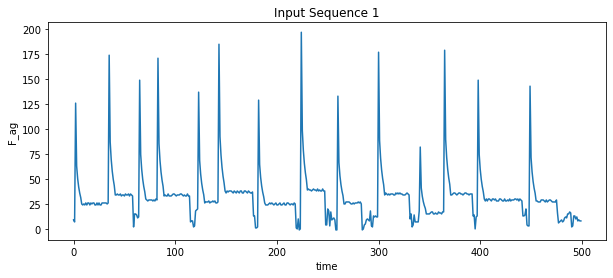

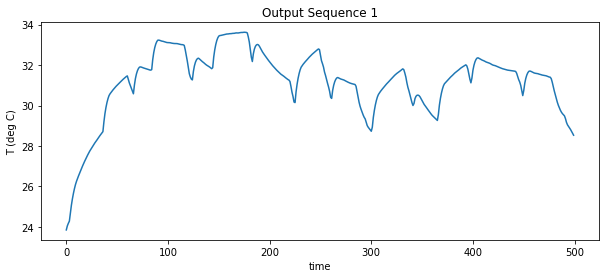

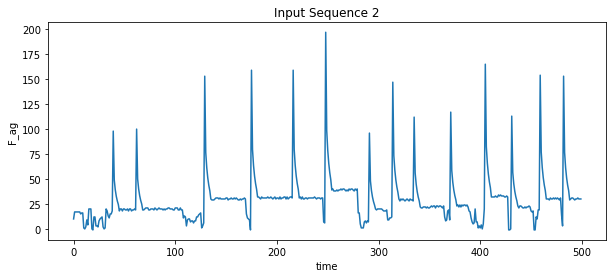

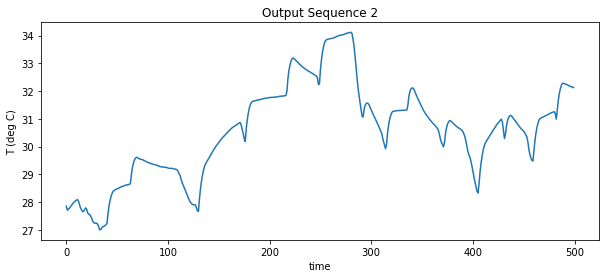

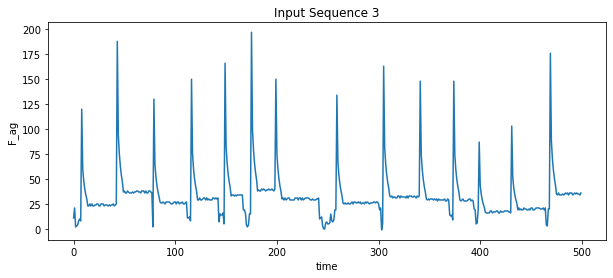

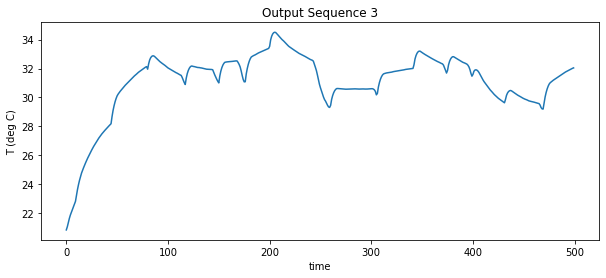

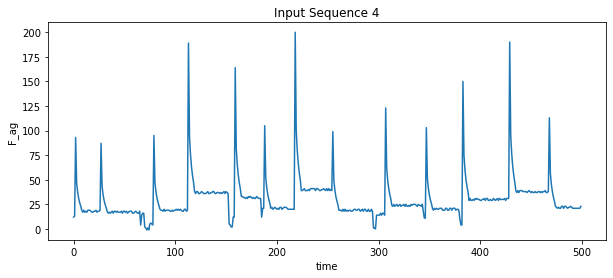

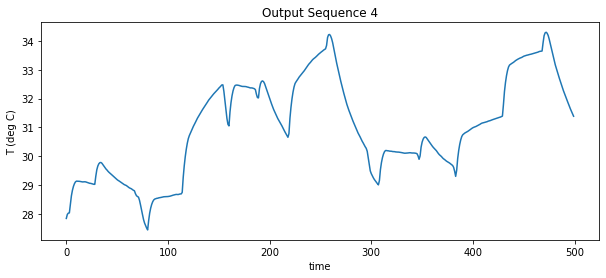

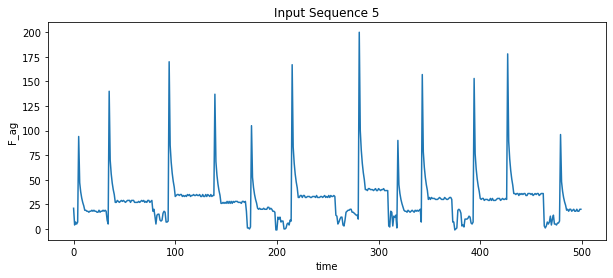

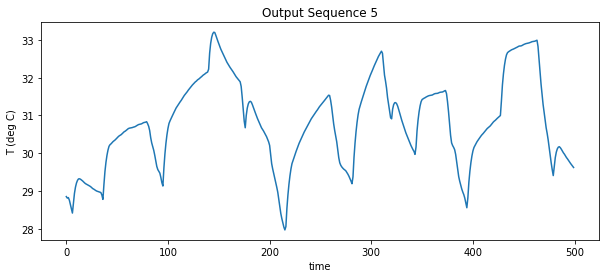

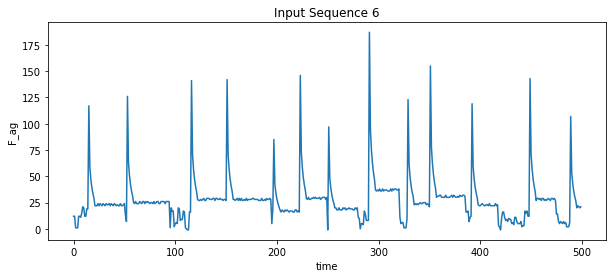

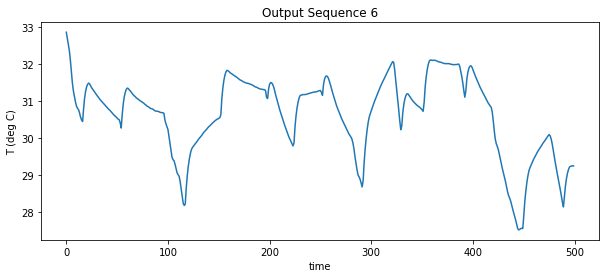

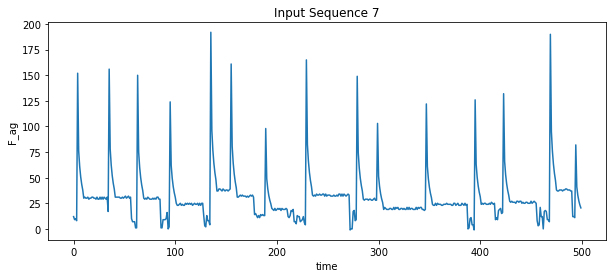

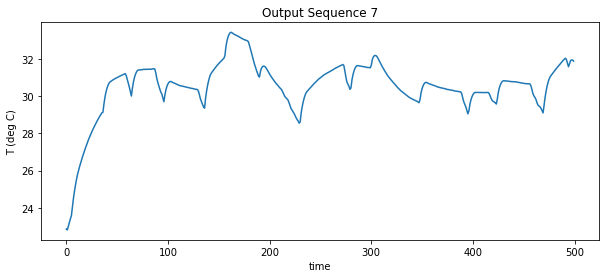

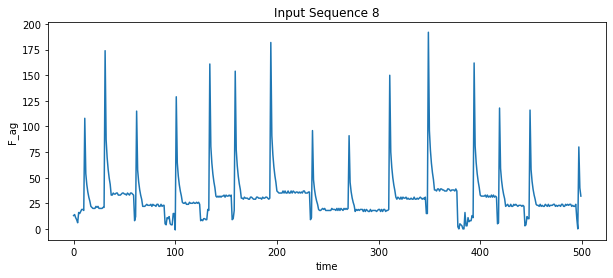

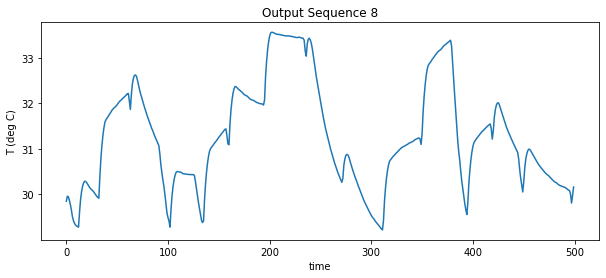

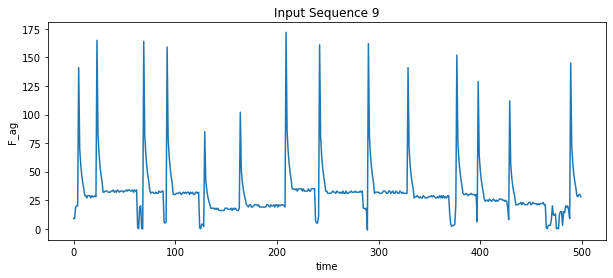

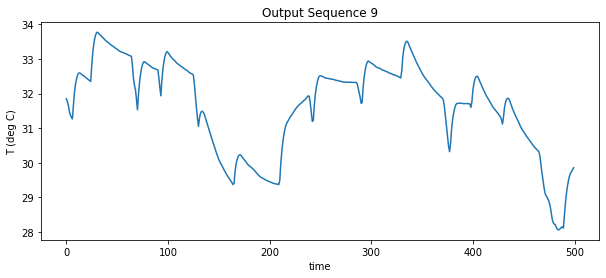

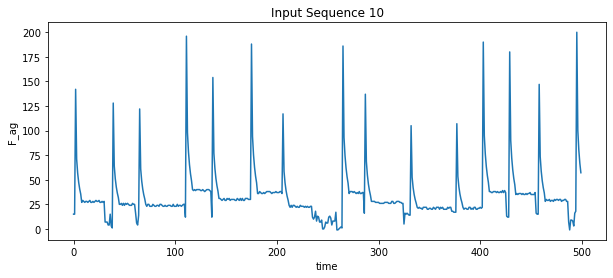

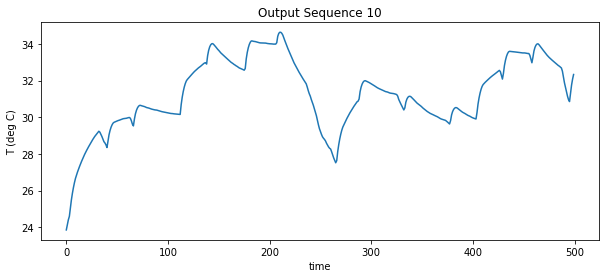

In [11]:
N = 10
test_solutions_name = str(N) + "test_solutions.npy"
test_F_ag_array_name = str(N) + "test_F_ag.npy"
save_dir = "./saved"
os.makedirs (save_dir, exist_ok=True)


test_random_inputs = generate_inputs (N)
test_solutions, test_F_ag_array = generate_ode_data(test_random_inputs, num_timesteps=500)

print ("="*50)
print ("Saved: ")
print (f"{test_solutions_name}: {test_solutions.shape}")
print (f"{test_F_ag_array_name}: {test_F_ag_array.shape}")
print ("="*50)

# SAVE
np.save (join(save_dir, test_solutions_name), test_solutions)
np.save (join(save_dir, test_F_ag_array_name), test_F_ag_array)

# PLOT
plot_ode_solutions (test_solutions)
plot_input_output(test_F_ag_array, test_solutions, N)

pre-processing data... with N =  10
Total test loss for set n =  0 : 47.72876397371292


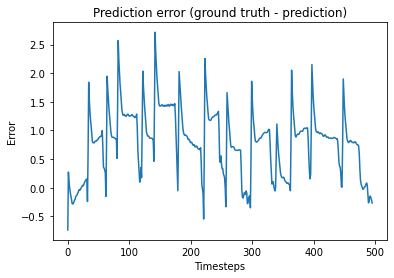

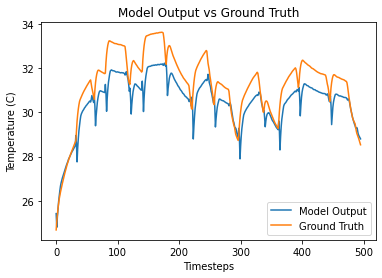

Total test loss for set n =  1 : 40.95666992640123


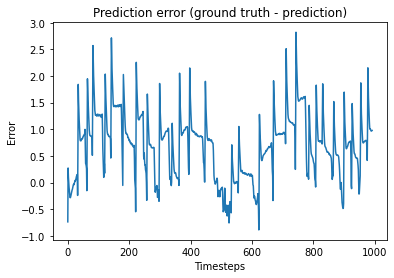

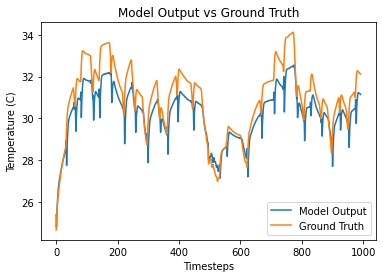

Total test loss for set n =  2 : 54.37343230030872


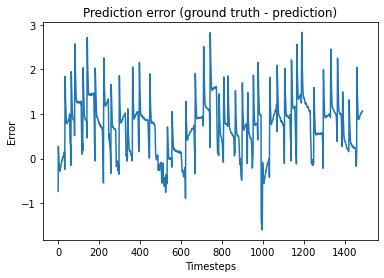

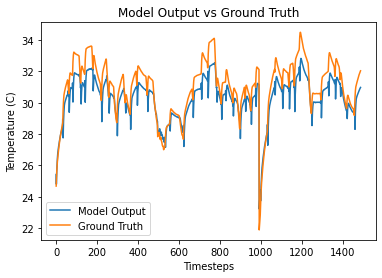

Total test loss for set n =  3 : 48.22488817975614


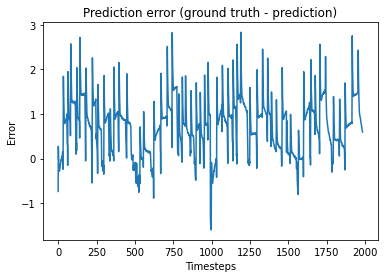

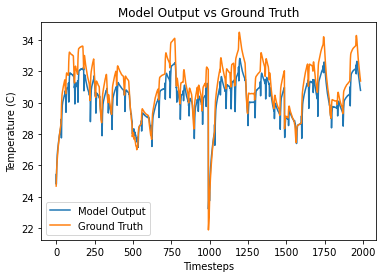

Total test loss for set n =  4 : 38.71759267210284


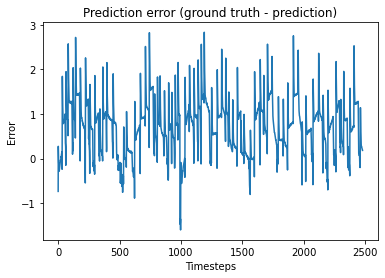

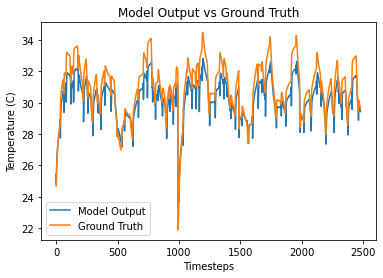

Total test loss for set n =  5 : 30.470474793448368


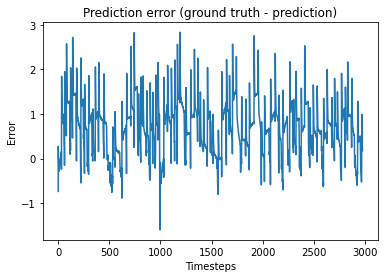

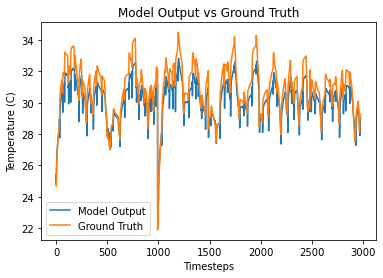

Total test loss for set n =  6 : 34.25731021639549


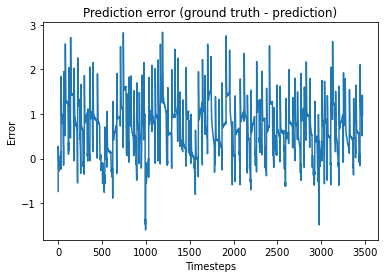

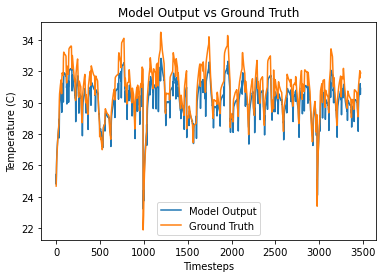

Total test loss for set n =  7 : 46.03128871061712


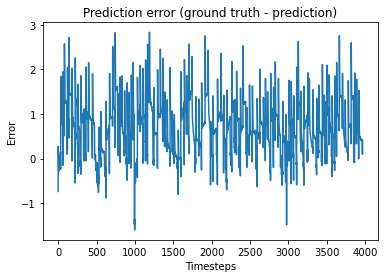

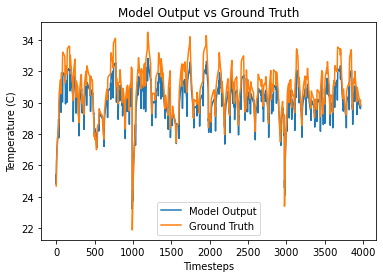

Total test loss for set n =  8 : 56.69714588645926


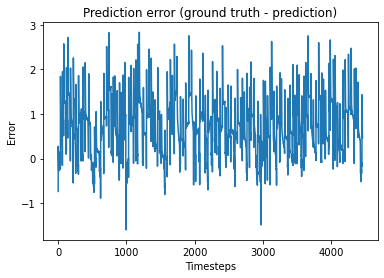

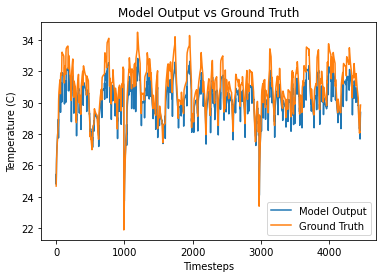

Total test loss for set n =  9 : 59.67949997444831


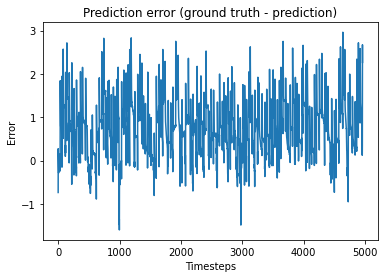

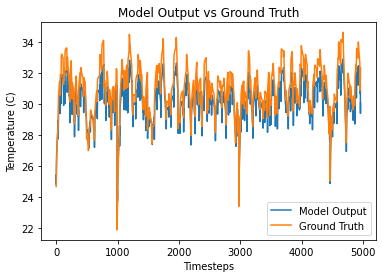

In [12]:
test_solutions_w_F_ag = np.concatenate((test_solutions, test_F_ag_array.reshape(N,1,num_timesteps)), axis=1)
# print(test_solutions_w_F_ag.shape)
test_data = data_preprocessing(test_solutions_w_F_ag,N = N, num_timesteps = num_timesteps, batch_size = 1, shuffle = False)
# print(test_data.size)

test(model, test_data)